# Marlow Case - TripleTen DS Program - Project 8: #
# Beta Bank Customer Departure Prediction Model #

# Table of Contents #
<a id='contents'></a>

- [1. Introduction](#intro)
    - [Criteria](#criteria)
- [2. Data Exploration](#explore)
    - [Data Description](#desc)
    - [Issues](#issues)
- [3. Data Preprocessing](#processing)
    - [Missing Values](#missing)
- [4. Exploratory Data Analysis](#eda)
    - [Distributions of Numerical Features](#dis_num_feats)
    - [Distributions of Categorical Features](#dis_cat_feats)
    - [Distribution of the Target Classes](#dis_target)
- [5. Feature Processing](#feat_process)
    - [Encoding](#encode)
    - [Log Transformation](#trans_log)
    - [Feature Scaling](#scale) 
- [6. Development and Tuning of Different Models](#model_tune)
    - [Functions](#model_tune)
    - [Baseline Models](#baseline)
    - [Class Weight Adjustment](#weights)
    - [Upsampling](#upsample)
        - [One to One](#one_to_one)
    - [Downsampling](#downsample)
        - [One to One](#down_one)
- [7. Final Model Selection and Evaluation](#final_model)
    - [7.1 Threshold Adjustments](#threshold)
    - [7.2 F1-Score, Precision, and Recall](#final_stats)
    - [7.3 Testing the Filled Data](#filled)
    - [7.4 ROC & AUC-ROC](#ROC)
- [8.0 Conclusion](#conclusion) 

## 1. Introduction ##
<a id='intro'></a>

___________________________________________________________________________________________________________________________________________________________

This project aims to develop a binary classification model for Beta Bank, because the bank is losing its customer base little by little every month! However, the bank has discovered that it is more cost-effective to retain the existing customers than to attract new ones. The model's objective is to predict whether a customer will leave the bank soon using the provided data on clients' past behavior. 

### Criteria ###
<a id='criteria'></a>
 - We must first train the model without taking into account the imbalance as requested by Beta Bank.
 - Afterwards, we must improve the quality of the model using at least two different approaches to fixing class imbalance.
 - We must train more than one model to find the best option
 - We must use a training and validation set; once the best model is found, we will test it with a test set.
 - **The final model must have an F1 score of at least 0.59**

[Back to Contents](#contents)

In [1]:
# For data preprocessing and manipulation
import pandas as pd
from pandas import DataFrame
from pandas import Series
import numpy as np
import inflection
import inspect

from itertools import product
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.utils import shuffle

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
#from matplotlib.lines import Line2D

# Machine learning models
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# For model evaluation
from sklearn.metrics import (accuracy_score, f1_score, precision_score, recall_score,
                            confusion_matrix, classification_report, roc_curve,
                            roc_auc_score)
#from sklearn.model_selection import cross_val_score

## 2. Data Exploration ##
<a id='explore'></a>

In [2]:
# Load the dataset
file_path = r"C:\Users\marlo\OneDrive\Desktop\Python_Work\Tripleten_Lessons\Sprint_8_Project\Churn.csv"

try:
    data = pd.read_csv("/datasets/Churn.csv")
except:
    data = pd.read_csv(file_path)

In [3]:
# Have a look at the data
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [4]:
data[data['EstimatedSalary'] == data['EstimatedSalary'].max()] #just curious heh heh

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6646,6647,15662021,Lucciano,685,Spain,Female,42,2.0,0.0,2,0,0,199992.48,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Quick summary: the dataset has `10,000 rows` (customers, assuming no duplicates) of data and `14 columns` related to the customer. It appears `Tenure` has some missing values. 

### Description of the Data ###
<a id='desc'></a>

**_Features:_**
- `RowNumber`       --- data string index
- `CustomerId`      --- unique customer identifier
- `Surname`         --- surname
- `CreditScore`     --- credit score
- `Geography`       --- country of residence
- `Gender`          --- gender
- `Age`             --- age
- `Tenure`          --- period of maturation for a customer's fixed deposit (_years_)
- `Balance`         --- account balance
- `NumOfProducts`   --- number of banking products used by the customer
- `HasCrCard`       --- customer has a credit card
- `IsActiveMember`  --- customer's activeness
- `EstimatedSalary` --- estimated salary

**_Target:_**
- `Exited` --- customer has left

### Issues to Correct (Cumulative List) ###
<a id='issues'></a>
1. The columns will be renamed using snake-case convention.
2. The `RowNumber`, `CustomerId`, and `Surname` columns/features would not provide any useful information to our model that would aid in predicting potential      leaving customers; thus, these features will be dropped.
3. The categorical features `Geography` and `Gender` will be transformed into numerical features before model development.
4. `Tenure` has `909 missing values` and will be converted to `int`. ([Added at this Cell](#issue_2))
5. Feature scaling will need to be applied since the numerical features scales differ. ([Added at this Cell](#issue_3))

In [6]:
# Check for duplicates
data.duplicated().sum()

0

In [7]:
# Check the data-types
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure             float64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [8]:
data['Tenure'].unique()

array([ 2.,  1.,  8.,  7.,  4.,  6.,  3., 10.,  5.,  9.,  0., nan])

In [9]:
# Check if there are any missing values - we know tenure has some
data.isna().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

<a id='issue_2'></a>
**_Notes:_**
- `Tenure` has no values that would require the float data-type, therefore this feature will be converted to `int` as a personal preference after addressing the missing values. (It would be fine to have this feature remain as a `float,` so depending on how the missing values analysis concludes, it may remain this data-type)

In [10]:
# Check description of numerical features
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


There are no obvious outliers or anomalies in the numerical features. 

However, the **values of the numerical features are at different scales and so feature scaling will need to be applied** before model development.
<a id='issue_3'></a>

[Back to Contents](#contents)

## 3. Data Preprocessing ##
<a id='processing'></a>

[Click Here](#issues) for the cumulative recap of our 5 issues that we will be correcting below. 

In [11]:
# Rename the column names with snake case - using inflection (probably one of the coolest libraries)
data.columns = [inflection.underscore(col) for col in data.columns]

data.columns

Index(['row_number', 'customer_id', 'surname', 'credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card',
       'is_active_member', 'estimated_salary', 'exited'],
      dtype='object')

In [12]:
# Drop the 3 unecessary feature columns
data = data.drop(columns = ['row_number', 'customer_id', 'surname'])
data.head()

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Let's address at the missing values next.
<a id='missing'></a>

In [13]:
# Create df containing only rows with missing values
tenure_na = data.query("tenure.isna()")
tenure_na.head()

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
30,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0


In [14]:
# Calcualte the number and percentage of missing data
num_na = tenure_na.shape[0]
perc_na = num_na / data.shape[0]
print(f"The number of missing values in \"tenure\": {num_na}.")
print(f"The percentage of missing values in \"tenure\": {perc_na:.2%}.")

The number of missing values in "tenure": 909.
The percentage of missing values in "tenure": 9.09%.


<a id='num_na'></a>
Since the percentage of missing values is close to 10%, it is not reasonable to simply remove this data; we should instead consider filling the missing values to preserve the valuable information in the other columns among these rows. 
We will now compare the missing tenure data and the original data distributions to see if their are any patterns among the missing data. 

In [15]:
# Compare the distributions of tenure_na and original df (numerical features)
print("Original Data: \n")
display(data.describe())
print("\n Missing Tenure Data: \n")
display(tenure_na.describe())

Original Data: 



,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
count,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000



 Missing Tenure Data: 



,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
count,909.000000,909.000000,0.0,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000
mean,648.451045,38.647965,NaN,76117.341474,1.530253,0.710671,0.510451,99180.389373,0.201320
std,99.079381,9.785438,NaN,63105.690715,0.588452,0.453701,0.500166,56378.063765,0.401207
min,359.000000,18.000000,NaN,0.000000,1.000000,0.000000,0.000000,106.670000,0.000000
25%,580.000000,32.000000,NaN,0.000000,1.000000,0.000000,0.000000,49872.330000,0.000000
50%,647.000000,37.000000,NaN,96674.550000,1.000000,1.000000,1.000000,99444.020000,0.000000
75%,718.000000,43.000000,NaN,128554.980000,2.000000,1.000000,1.000000,145759.700000,0.000000
max,850.000000,92.000000,NaN,206663.750000,4.000000,1.000000,1.000000,199390.450000,1.000000


For the numerical features, the distributions of the original data and the missing tenure data are similar. The data among the rows with missing `tenure` data do not appear to show any patterns. 

In [16]:
# Compare the distributions of tenure_na and original df (categorical data)
og_geo = data['geography'].value_counts(normalize = True)
na_geo = tenure_na['geography'].value_counts(normalize = True)

comp_geo = pd.concat([og_geo, na_geo], 
                     axis = 1, #for side-by-side
                     keys = ['original_data', 'tenure_data']).reset_index()

og_gend = data['gender'].value_counts(normalize = True)
na_gend = tenure_na['gender'].value_counts(normalize = True)

comp_gend = pd.concat([og_gend, na_gend],
                      axis = 1,
                      keys = ['original_data', 'tenure_data']).reset_index()

In [17]:
display(comp_geo)
display(comp_gend)

,geography,original_data,tenure_data
0,France,0.5014,0.510451
1,Germany,0.2509,0.237624
2,Spain,0.2477,0.251925


,gender,original_data,tenure_data
0,Male,0.5457,0.531353
1,Female,0.4543,0.468647


For the categorical features, similar to the numerical features, the distributions of the original data and the missing tenure data are similar - infact, almost identical. Therefore, we can conclude that the missing values in `tenure` show no pattern and we can assume that the data is _missing completely at random_. Let's first observe the distribution of the data within the `tenure` column before choosing a method to fill the missing data.

In [18]:
# print distribution of data in tenure_na
ten_data = data['tenure'].value_counts().sort_index().reset_index()
ten_data_perc = data['tenure'].value_counts(normalize = True).sort_index().reset_index()
ten_data_perc

,tenure,proportion
0,0.0,0.042020
1,1.0,0.104719
2,2.0,0.104499
3,3.0,0.102079
4,4.0,0.097349
5,5.0,0.101969
6,6.0,0.096909
7,7.0,0.101749
8,8.0,0.102629
9,9.0,0.097019


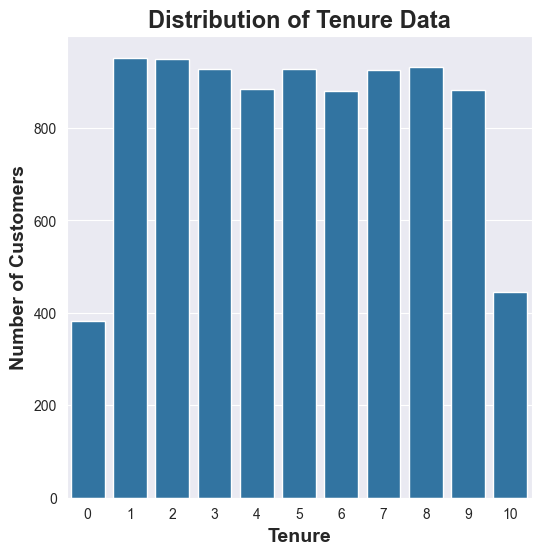

In [19]:
# plot the distribution via bar chart
sns.set_style('darkgrid')
plt.figure(figsize = (6,6))

sns.barplot(data = ten_data, x = 'tenure', y = 'count')

plt.title("Distribution of Tenure Data", fontsize = 17, fontweight = 'bold')
plt.xlabel("Tenure", fontsize = 14, fontweight = 'bold')
plt.ylabel("Number of Customers", fontsize = 14, fontweight = 'bold')
plt.xticks([x for x in range(11)], labels = [x for x in range(11)]) #to remove float visualization

plt.show()

The data is not normally distributed but is almost uniformally distributed except for `tenure` values `0` and `10`. In this case, it would be inappropriate to fill the missing values with the mean, median, or mode as it would distort the current distribution of data. In order to maintain this distribution, we will fill the missing values with random samples based on the relative frequencies. 

In [20]:
# Set up a random generator to generate random samples
choices = data['tenure'].value_counts().index
probs = data['tenure'].value_counts(normalize = True).values

generator = np.random.Generator(np.random.PCG64(12345))
random_samples = generator.choice(a = choices,
                                  size = num_na, # from cell 14
                                  p = probs)
# Check the samples
random_samples[:10]

array([ 8.,  3.,  9.,  4.,  3.,  3.,  7.,  2.,  4., 10.])

In [21]:
# Replace the missing values
data.loc[data['tenure'].isna(), 'tenure'] = random_samples

In [22]:
# Change tenure to int
data['tenure'] = data['tenure'].astype('int')

In [23]:
# Check data-types
data.dtypes

credit_score          int64
geography            object
gender               object
age                   int64
tenure                int32
balance             float64
num_of_products       int64
has_cr_card           int64
is_active_member      int64
estimated_salary    float64
exited                int64
dtype: object

In [24]:
# Final missing value check
data.isnull().sum()

credit_score        0
geography           0
gender              0
age                 0
tenure              0
balance             0
num_of_products     0
has_cr_card         0
is_active_member    0
estimated_salary    0
exited              0
dtype: int64

In [25]:
# Check the distributions after replacing
ten_data_perc

,tenure,proportion
0,0.0,0.042020
1,1.0,0.104719
2,2.0,0.104499
3,3.0,0.102079
4,4.0,0.097349
5,5.0,0.101969
6,6.0,0.096909
7,7.0,0.101749
8,8.0,0.102629
9,9.0,0.097019


At this point the only remaining issue in our cumulative list ([Click Here](#issues)) is item 3: transforming the categorical variables Gender, and Geography before model development. This will be tackled in a later section. In the next section we will explore the data and the distributions of the categorical and numerical features. 

[Back to Contents](#contents)

## 4. Exploratory Data Analysis (EDA) ##
<a id='eda'></a>
_________________________________________________________________________________________________________________________________________________________

In [26]:
# Create a function for ease of plotting distribution of numerical features
def graph_numerical_features(data: DataFrame):
    '''
        This function serves to graph four numerical features from the provided data related to this project: 
        credit score, age, account balance, and estimated salary. 

        Inputs:
        data - dataframe: the data used to plot the numerical features.
    '''

    # column, x-label
    numerical_features = [
        ('credit_score', 'Credit Score'),
        ('age', 'Customer Age'),
        ('balance', 'Customer Account Balance'),
        ('estimated_salary', 'Estimated Salary')
    ]

    fig, axs = plt.subplots(2, 2, figsize = (10, 8))
    fig.suptitle("Distribution of the Numerical Features", fontsize = 17, fontweight = 'bold')
    axs = axs.flatten()

    for i, (feature, xlabel) in enumerate(numerical_features):
        sns.histplot(x = data[feature], bins = 25, ax=axs[i])
        axs[i].set_title(xlabel, fontsize = 15, fontweight = 'bold')
        axs[i].set_xlabel(xlabel, fontweight = 'bold')
        axs[i].set_ylabel('Number of Customers', fontweight = 'bold')
    
    plt.tight_layout()
    plt.show()

In [27]:
def box_numerical_features_on_target(data: DataFrame, target: str):
    '''
        This function serves to graph four categorical features from the provided data related to this project on the target column: 
        credit score, age, account balance, and estimated salary. 

        Inputs:
        data - dataframe: the data used to plot the numerical features.
        target - string: the target column name
    '''

    # column, y-label
    numerical_features = [
        ('credit_score', 'Credit Score'),
        ('age', 'Customer Age'),
        ('balance', 'Customer Account Balance'),
        ('estimated_salary', 'Estimated Salary')
    ]

    fig, axs = plt.subplots(2,2, figsize = (10,8))
    fig.suptitle("Distribution of Numerical Features per Target Class", fontsize = 17, fontweight = 'bold')
    axs = axs.flatten()

    for i, (feature, ylabel) in enumerate(numerical_features):
        sns.boxplot(data = data, x = target, y = feature, hue = target, ax = axs[i])
        axs[i].set_title(ylabel, fontsize = 15, fontweight = 'bold')
        axs[i].set_xlabel(target, fontweight = 'bold')
        axs[i].set_ylabel(ylabel, fontweight = 'bold')

    plt.tight_layout()
    plt.show()

In [28]:
def target_class_dist(target):
    '''
        This function will calculate the number and percentage of each target class 
        and plot a countplot to show the distribbutions of target classes.

        Parameters:
        target (Series) - The series containing the target data. 
    '''

    # Plot a countplot to show the distribution
    sns.set_style('darkgrid')
    plt.figure(figsize = (4,3))
    
    sns.countplot(x = target,
                  palette = 'dark:blue',
                  width = 0.5,
                  hue = target,
                  legend = 'brief')
    
    plt.title("Distribution of Target Classes", fontsize = 17, fontweight = 'bold')
    plt.xlabel("Exited", fontweight = 'bold')
    plt.ylabel('Number of Customers', fontweight = 'bold')
    plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))
    plt.show()

    # Calculate the proportion of each class
    class_0_count = target.value_counts()[0]
    class_1_count = target.value_counts()[1]
    class_total = class_0_count + class_1_count

    # Print the results
    print(f"\nCount of Class 0: {class_0_count}")
    print(f"Count of Class 1: {class_1_count}")
    print("-" * 80)
    print(f"Percentage of class 0: {class_0_count / class_total:.2%}")
    print(f"Percentage of class 1: {class_1_count / class_total:.2%}")
    print("-" * 80)
    print(f"\n The ratio of 0 to 1 is {class_0_count / class_1_count:.2f}")

## 4.1 Distributions of Numerical Features ##
<a id='dis_num_feats'></a>

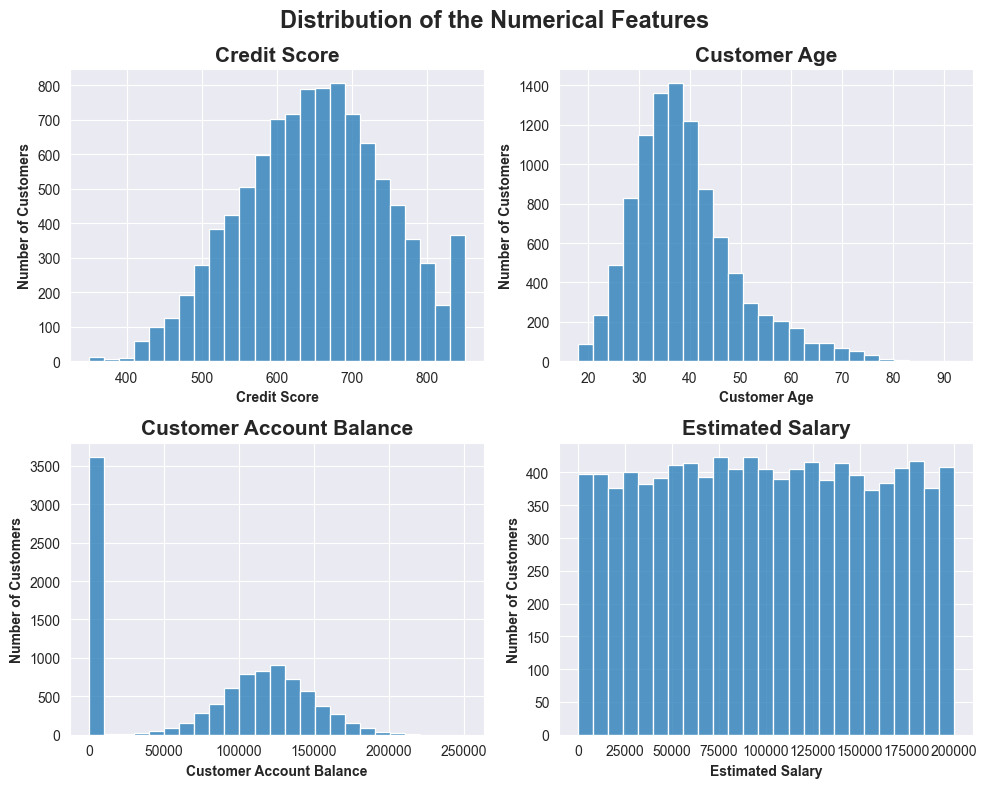

In [29]:
graph_numerical_features(data)

**Notes:**
- The `Credit Score` and `Customer Age` distributions have some skewness, but are normally distributed via CTL. `Credit Score` skewed slightly to the left and `Customer Age` has more significant right skewness.
- `Customer Account Balance` is nicely normally distributed, however there are a large amount of 0 values (over 35% of the total data).
- `Estimated Salary` is uniformally distributed.
- Since `Esitmated Salary` is uniformally distributed, and since this is a random sample, we should actually see a normal distribution in `Customer Account Balance`, so we need to address the 0 values in some way. 

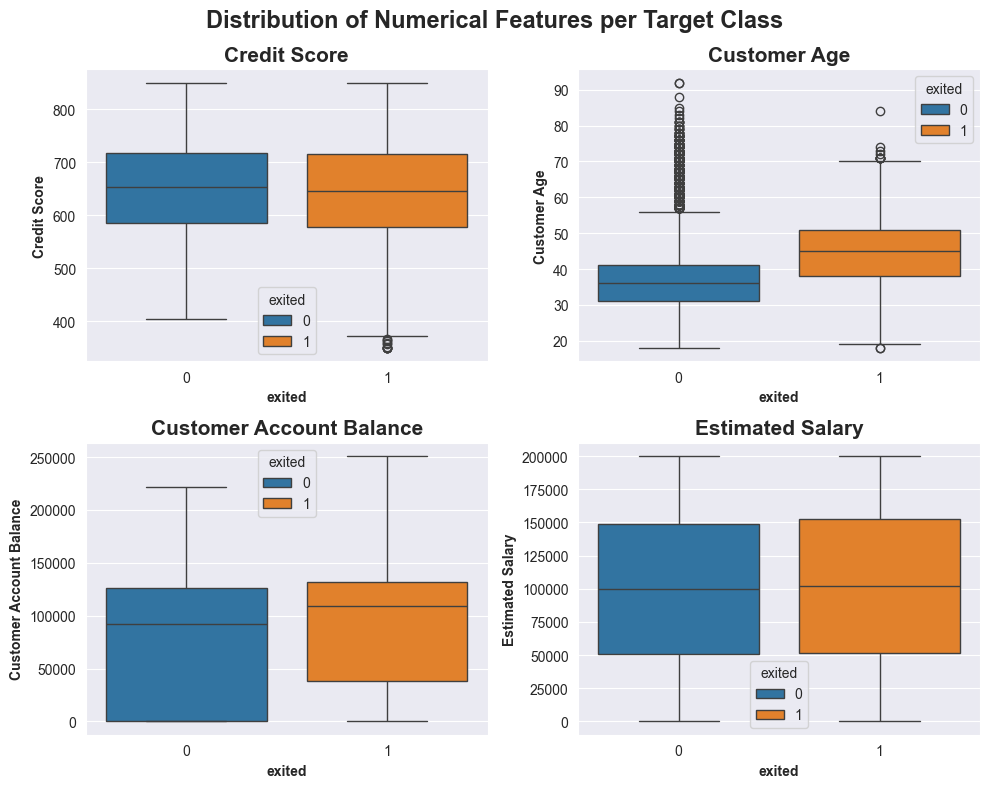

In [30]:
box_numerical_features_on_target(data, 'exited')

**Notes:** 

Looks as if most customers that exited were above the age of 40. This does overlap with the active-members who stayed, but there is a noticable shift in age. Age appears to be a great indicator for a model to predict whether a customer will leave. Every other feature is identical (except balance, but this is most likely due to the 0s.)

In [31]:
balance_na = data.query("balance == 0")
balance_na['is_active_member'].value_counts()

is_active_member
1    1873
0    1744
Name: count, dtype: int64

Half of the 0s are inactive members. This creates some very tricky scenarios. 

If we assume all of the active member 0s are due to either just missing information (which seems unlikely coming from a bank) or to the fact they are new members (which we can look into); and we assume all the inactive members that exited 0s are due to customer's exiting, then the remaining 0 balance rows can be treated as null values, and address those accordingly. 

We cannot simply treat all 0 balances as null values, because there may be scenarios as described above where there would be a true 0. The model would not be able to learn if we removed all these 0s, especially since balance is a powerful predicter for exits. Also, we cannot remove all 0 balances as this is 36% of the data. 

Let's look at the distribution of these features on the target class. 

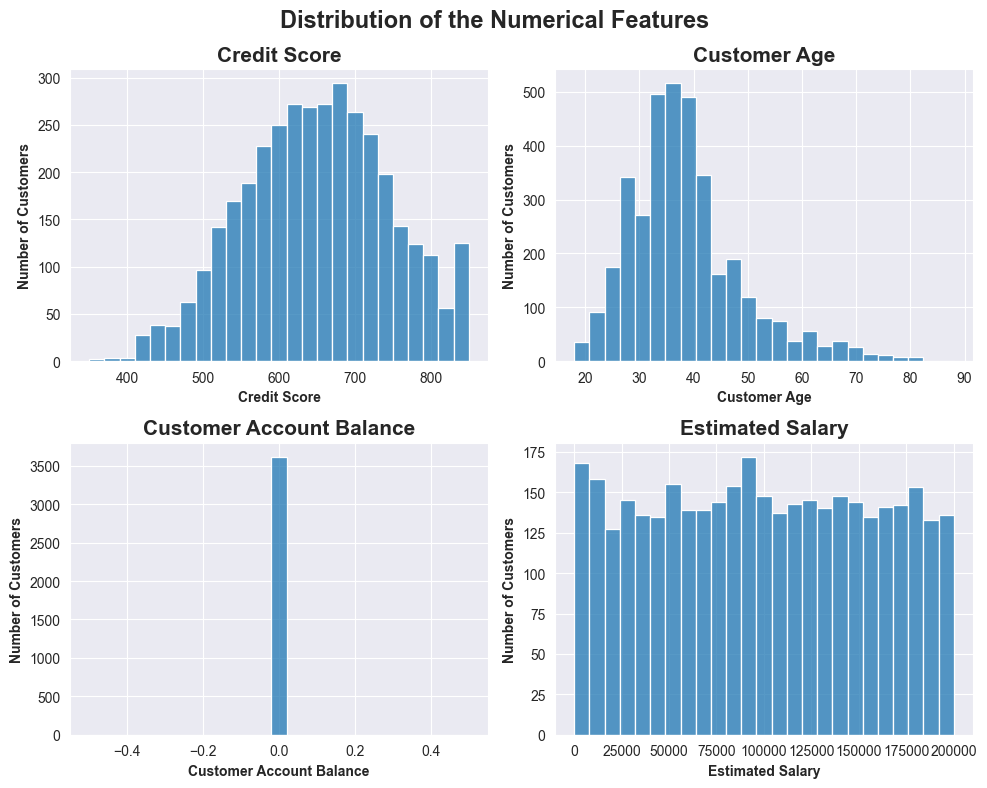

In [32]:
graph_numerical_features(balance_na)

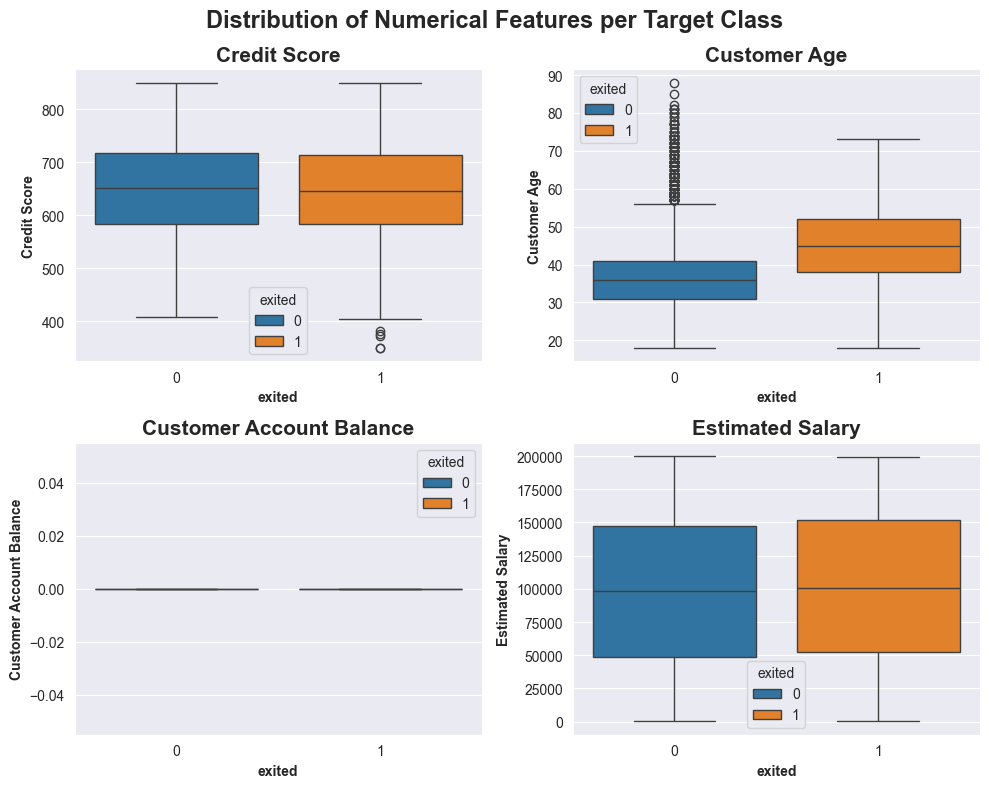

In [33]:
box_numerical_features_on_target(balance_na, 'exited')

In [34]:
no_zeros = data.query("balance != 0")
no_zeros.head()

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1


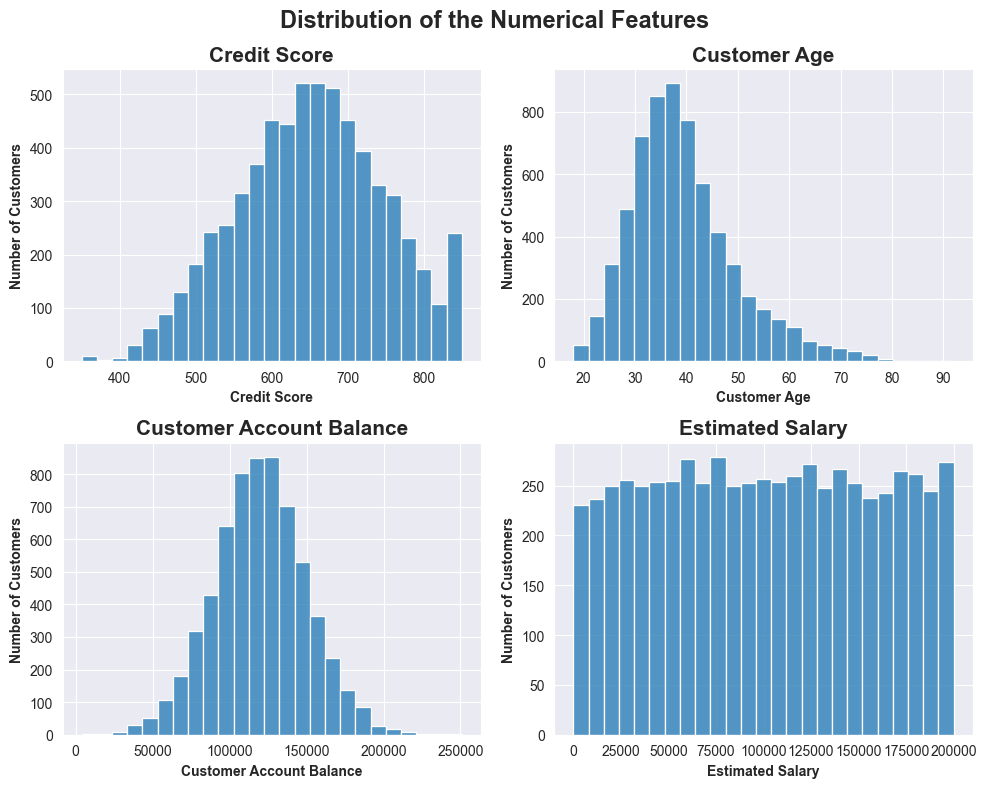

None

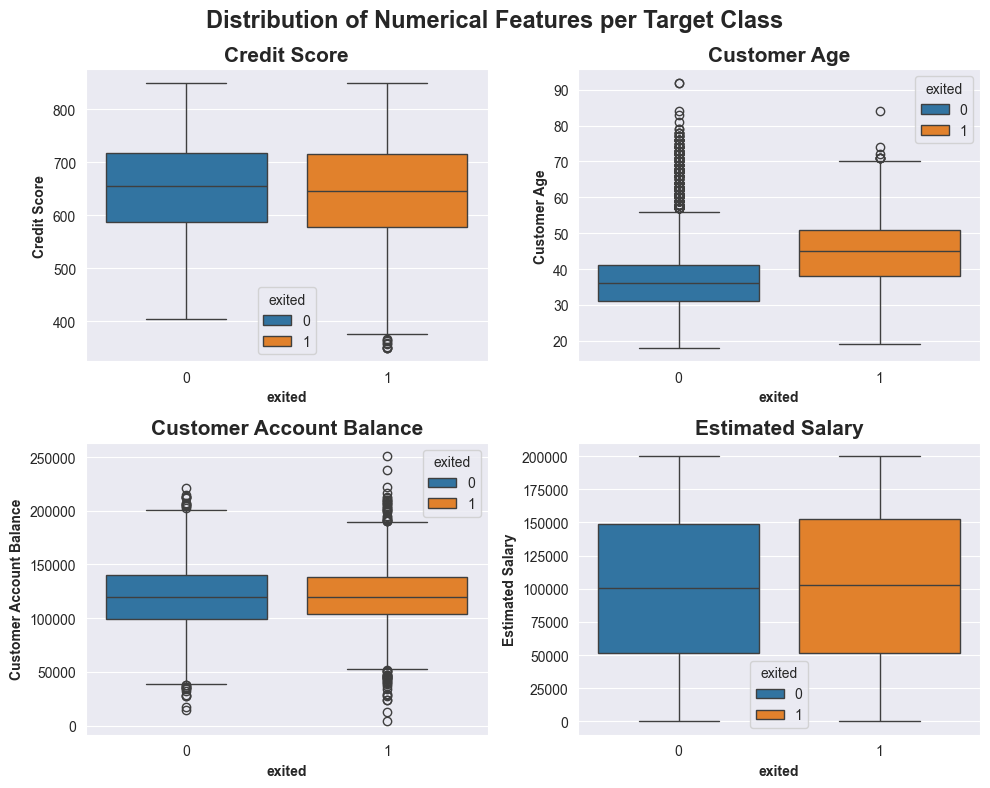

None

In [35]:
display(graph_numerical_features(no_zeros))
display(box_numerical_features_on_target(no_zeros, 'exited'))

Without the zeros we can clearly see that the numerical features are all identical except for `age`. Therefore, the best strategy to handle the zeros, except for in cases where `tenure` is 0, is to randomly fill these values as we did `tenure`. 

In [36]:
def fill_balance(group):
    # Skip over tenure == 0
    if group['tenure'].iloc[0] != 0:
        # Extract non-zero balance values
        non_zero_balances = group['balance'].replace(0, np.nan).dropna()

        # Calculate probabilities based on the freq of each non-zero balance
        probs = non_zero_balances.value_counts(normalize = True)

        # Fill the zero balances with random choices based on the probs
        group['balance'] = group['balance'].apply(
            lambda x: generator.choice(probs.index, p = probs) if x == 0 else x
        )

    return group

In [37]:
data_filled = data.groupby('tenure').apply(fill_balance).reset_index(drop = True)

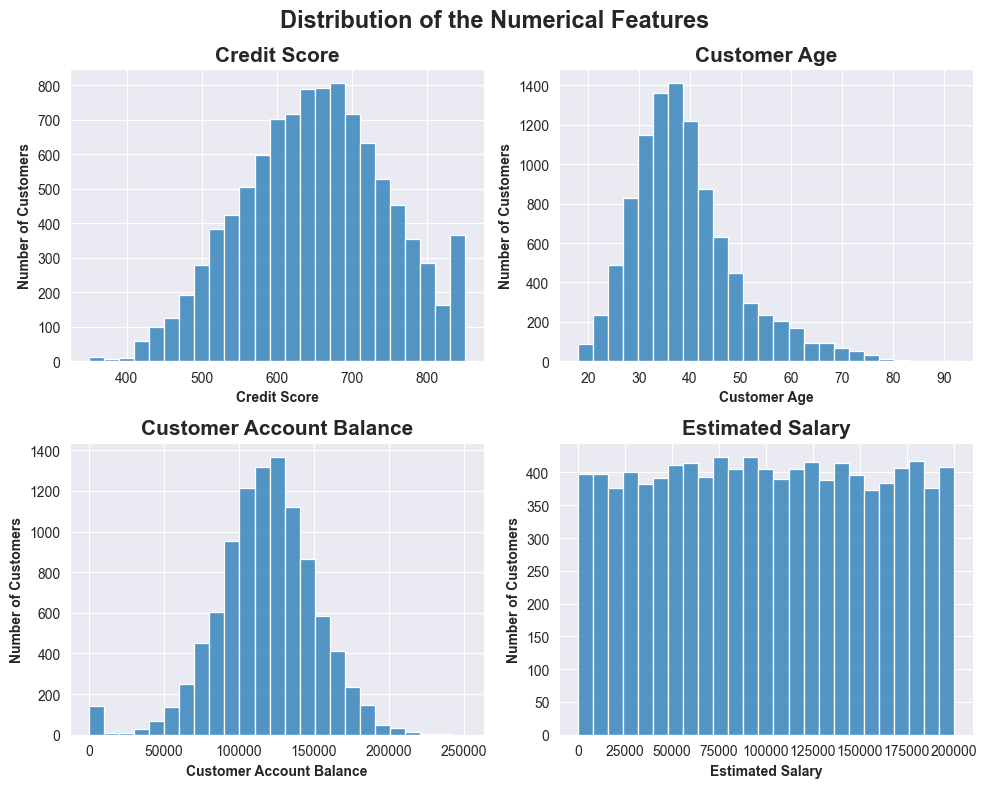

None

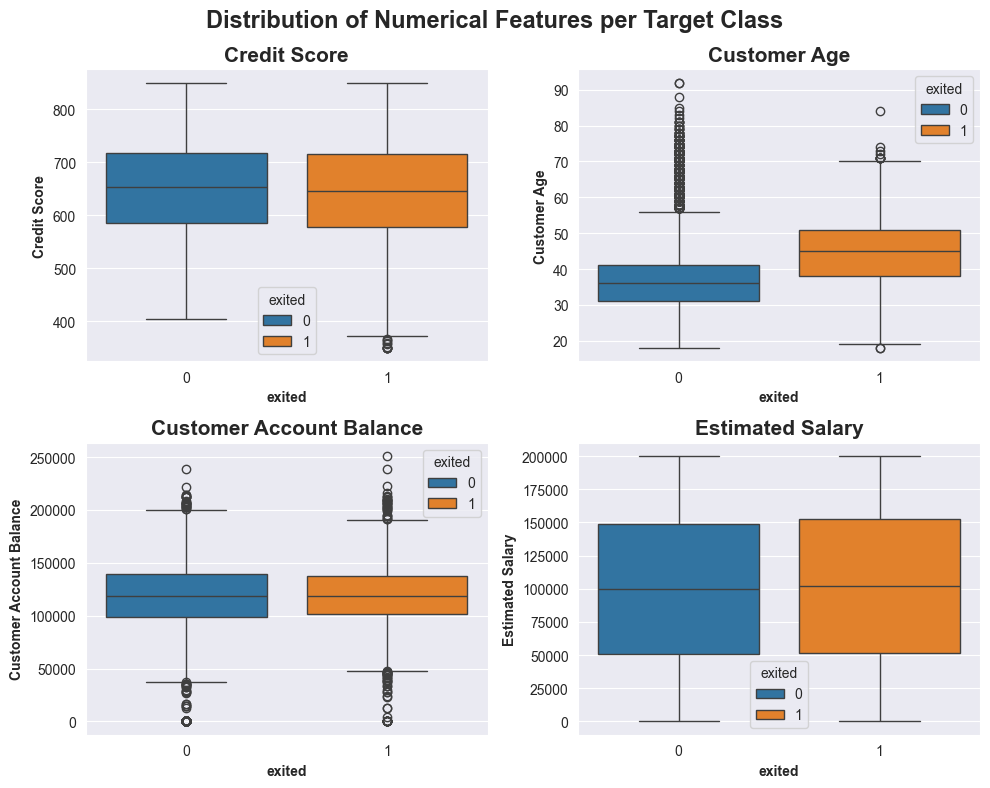

None

In [38]:
# Look at the distributions
display(graph_numerical_features(data_filled))
display(box_numerical_features_on_target(data_filled, 'exited'))

This data looks fantastic!

The only thing we will want to apply later is a Log Transformation on `credit_score` and `age` to make those data distributions closer to a normal distribution. This will also help reduce the impact of outliers. <a id='log_trans'></a>

**_At this point it is important to recognize that this is a major assumption with the data, therefore when we develop models to help with our prediction, I will test this on both the original data (data) and this filled data (data_filled), and see if there are any improvements/differences._** 

[Back to Contents](#contents)

## 4.2 Distributions of Categorical Variables ##
<a id='dis_cat_feats'></a>

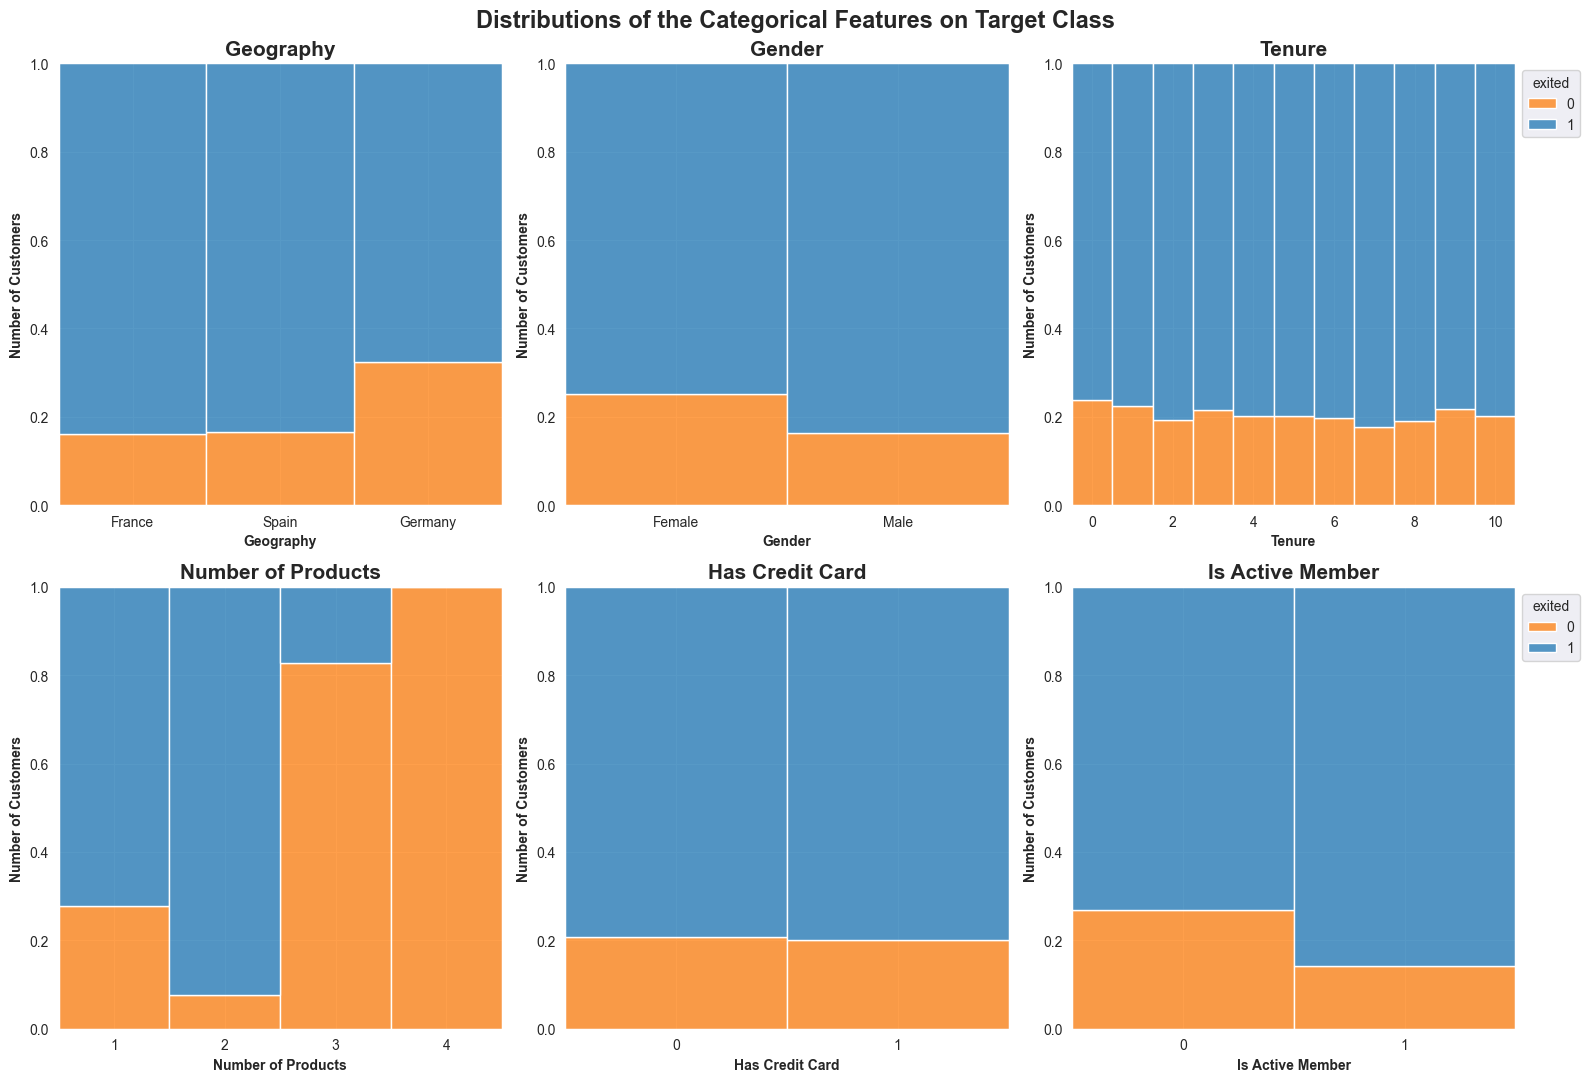

In [39]:

# column, x-label; 
#changing this to a list caused the axs order to remain the same!
categorical_features = [
    ('geography', 'Geography'),
    ('gender', 'Gender'),
    ('tenure', 'Tenure'),
    ('num_of_products', 'Number of Products'),
    ('has_cr_card', 'Has Credit Card'),
    ('is_active_member', 'Is Active Member')
]

fig, axs = plt.subplots(2, 3, figsize = (16,11))
fig.suptitle("Distributions of the Categorical Features on Target Class", fontsize = 17, fontweight = 'bold')
axs = axs.flatten()

for i, (feature, xlabel) in enumerate(categorical_features):
    sns.histplot(x = data[feature], hue = data['exited'], 
                 multiple = 'fill', discrete = True, ax=axs[i])
    axs[i].set_title(xlabel, fontsize = 15, fontweight = 'bold')
    axs[i].set_xlabel(xlabel, fontweight = 'bold')
    axs[i].set_ylabel("Number of Customers", fontweight = 'bold')

    if i == 2 or i == 5:
        axs[i].legend(title = 'exited', labels = [0,1], loc = 'upper left', bbox_to_anchor=(1,1))
    else:
        axs[i].get_legend().remove()

axs[3].set_xticks([x for x in range(1,5)])
axs[4].set_xticks([0,1], [0,1]) 
axs[5].set_xticks([0,1], [0,1])
plt.tight_layout()
plt.show()

From this plot, it appears all columns except `tenure` and `has_cr_card` are potential predictors of customer departure. The following below summarizes which categories are more likely to have customer departure:
- `Geography:` Germany
- `Gender:` Female
-  `Numver of Products:` 3-4
-  `Is Active Member:` No

[Back to Contents](#contents)

## 4.3 Distribution of the Target Class ##
<a id='dis_target'></a>

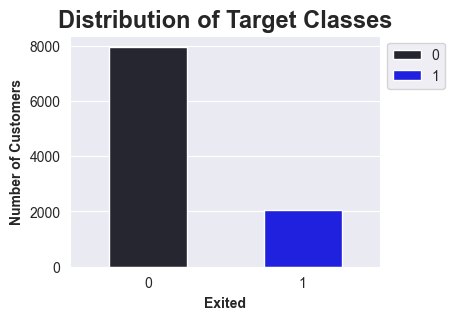


Count of Class 0: 7963
Count of Class 1: 2037
--------------------------------------------------------------------------------
Percentage of class 0: 79.63%
Percentage of class 1: 20.37%
--------------------------------------------------------------------------------

 The ratio of 0 to 1 is 3.91


In [40]:
target_class_dist(data['exited'])

The distribution of the target class is largely imbalanced, with the ratio of the `0 class` to `1 class` being almost 4 times or 80:20. This can lead to bias towards majority classes and cause poor predictive performance. To address on the imbalanced classification issue we can indtroduce both downsampling and upsampling. 

[Back to Contents](#contents)

# 5. Feature Processing #
<a id='feat_process'></a>

Since we will be developing models trained on data without filling the zeros in `balance` and with filling the zeros, _and_ we are only developing tree models, we will need to make copies of our base dataframes. 

_Due to the complexity that a regression model would add to our process, we will not be evaluating a regression model here. Since we want to test filled balance data versus no filled balance, adding a regression model would mean we would need two more data sets that have OHE and not label encoding, quadrupling the amount of model testing we would need to do. For the sake of time, we will not continue with this endeavor, but I will not be removing any code that pertains to those data sets (in case I ever revisit this task), the remaining code and data sets just won't be used, but it is completed below._

_As an additional note, we could just not use OHE encoding, but this would harm the integrity of that model and would still require slightly different metric analysis than the tree based models. This further solidifies my decision._ 


In [41]:
# Currently we have data and data_filled; we need data_reg, data_filled_reg; data_tree, data_filled_tree
reg = data.copy()
tree = data.copy()
filled_reg = data_filled.copy()
filled_tree = data_filled.copy()

**_Label Encoding_**
<a id='encode'></a>

In [42]:
# Perform label encoding on the geography feature
oc = OrdinalEncoder()

tree['geography'] = oc.fit_transform(tree['geography'].values.reshape(-1,1))
filled_tree['geography'] = oc.fit_transform(filled_tree['geography'].values.reshape(-1,1))

# Observe
tree['geography'].head()

0    0.0
1    2.0
2    0.0
3    0.0
4    2.0
Name: geography, dtype: float64

**_One-Hot Encoding_**

In [43]:
# Perform one-hot encoding on the gender feature (for tree models) and on gender and geo (reg model)
# Drop one of the columns to avoid dummy trap

# Tree data first
tree_ohe = pd.get_dummies(tree, drop_first = True)
filled_tree_ohe = pd.get_dummies(filled_tree, drop_first = True)

# Reg data second - should do geo and gender
reg_ohe = pd.get_dummies(reg, drop_first = True)
filled_reg_ohe = pd.get_dummies(filled_reg, drop_first = True)

# Observe - looks good
display(tree_ohe.head(1))
display(reg_ohe.head(1))

,credit_score,geography,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,gender_Male
0,619,0.0,42,2,0.0,1,1,1,101348.88,1,False


,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,geography_Germany,geography_Spain,gender_Male
0,619,42,2,0.0,1,1,1,101348.88,1,False,False,False


**_Log Transformation_**
<a id='trans_log'></a>

We want to optimize the loss function on our models that use one. Therefore, log transformation will be applied to `credit_score` and `age` as mentioned earlier ([see here](#log_trans)). 

In [44]:
# ensure no 0s in age or credit score - can also look back at describe
data[['age', 'credit_score']].describe()

,age,credit_score
count,10000.000000,10000.000000
mean,38.921800,650.528800
std,10.487806,96.653299
min,18.000000,350.000000
25%,32.000000,584.000000
50%,37.000000,652.000000
75%,44.000000,718.000000
max,92.000000,850.000000


In [45]:
# Perform log transformation on the credit_score and age features
df_list = [tree_ohe, filled_tree_ohe, reg_ohe, filled_reg_ohe]

for df in df_list:
    df['log_credit_score'] = np.log(df['credit_score'])
    df['log_age'] = np.log(df['age'])

# Observe - looks good
display(tree_ohe.head(2))
display(reg_ohe.head(2))

,credit_score,geography,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,gender_Male,log_credit_score,log_age
0,619,0.0,42,2,0.00,1,1,1,101348.88,1,False,6.428105,3.737670
1,608,2.0,41,1,83807.86,1,0,1,112542.58,0,False,6.410175,3.713572


,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,geography_Germany,geography_Spain,gender_Male,log_credit_score,log_age
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False,6.428105,3.737670
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False,6.410175,3.713572


**_Feature Scaling_**
<a id='scale'></a>

We have a wide range of values amongst different columns, therefore all numerical features will be scaled to standardization to ensure the range of values is on the same scale. This will further improve our algorithms.

In [46]:
# Set up the feature variables and target variables
# Tree model data
Xt = tree_ohe.drop(columns = ['age', 'credit_score', 'exited'])
Yt = tree_ohe['exited']

Xtf = filled_tree_ohe.drop(columns = ['age', 'credit_score', 'exited'])
Ytf = filled_tree_ohe['exited']

# Reg model data
Xr = reg_ohe.drop(columns = ['age', 'credit_score', 'exited'])
Yr = reg_ohe['exited']

Xrf = filled_reg_ohe.drop(columns = ['age', 'credit_score', 'exited'])
Yrf = filled_reg_ohe['exited']

In [47]:
# Separate the data into training set, validation set, and test set
# First split into train/val and test -- then train/val into train and val: 70:15:15
Xt_train_val, Xt_test, Yt_train_val, Yt_test = train_test_split(Xt, Yt, test_size = 0.15, random_state = 54321)
Xt_train, Xt_val, Yt_train, Yt_val = train_test_split(Xt_train_val, Yt_train_val, test_size = 3/17, random_state = 54321)

Xtf_train_val, Xtf_test, Ytf_train_val, Ytf_test = train_test_split(Xtf, Ytf, test_size = 0.15, random_state = 54321)
Xtf_train, Xtf_val, Ytf_train, Ytf_val = train_test_split(Xtf_train_val, Ytf_train_val, test_size = 3/17, random_state = 54321)

Xr_train_val, Xr_test, Yr_train_val, Yr_test = train_test_split(Xr, Yr, test_size = 0.15, random_state = 54321)
Xr_train, Xr_val, Yr_train, Yr_val = train_test_split(Xr_train_val, Yr_train_val, test_size = 3/17, random_state = 54321)

Xrf_train_val, Xrf_test, Yrf_train_val, Yrf_test = train_test_split(Xrf, Yrf, test_size = 0.15, random_state = 54321)
Xrf_train, Xrf_val, Yrf_train, Yrf_val = train_test_split(Xrf_train_val, Yrf_train_val, test_size = 3/17, random_state = 54321)

In [48]:
# Check percentage of one set; if one is good all are good. 
print(f"Percentage of Feature Training Sets: {Xt_train.shape[0] / Xt.shape[0]:.0%}")
print(f"Percentage of Target Training Sets: {Yt_train.shape[0] / Yt.shape[0]:.0%}\n")

print(f"Percentage of Feature Validation Sets: {Xt_val.shape[0] / Xt.shape[0]:.0%}")
print(f"Percentrage of Target Validation Sets: {Yt_val.shape[0] / Yt.shape[0]:.0%}\n")

print(f"Percentage of Feature Test Sets: {Xt_test.shape[0] / Xt.shape[0]:.0%}")
print(f"Percentage of Target Test Sets: {Yt_test.shape[0] / Yt.shape[0]:.0%}")

Percentage of Feature Training Sets: 70%
Percentage of Target Training Sets: 70%

Percentage of Feature Validation Sets: 15%
Percentrage of Target Validation Sets: 15%

Percentage of Feature Test Sets: 15%
Percentage of Target Test Sets: 15%


In [49]:
# Check shape of one set; if one is good all are good
print(f"Shape of Feature Train Set: {Xt_train.shape}")
print(f"Shape of Target Train Set: {Yt_train.shape}\n")

print(f"Shape of Feature Validation Set: {Xt_val.shape}")
print(f"Shape of Target Validation Set: {Yt_val.shape}\n")

print(f"Shape of Feature Test Set: {Xt_test.shape}")
print(f"Shape of Target Test Set: {Yt_test.shape}")

Shape of Feature Train Set: (7000, 10)
Shape of Target Train Set: (7000,)

Shape of Feature Validation Set: (1500, 10)
Shape of Target Validation Set: (1500,)

Shape of Feature Test Set: (1500, 10)
Shape of Target Test Set: (1500,)


In [50]:
# Perform feature scaling on the features
sc_t = StandardScaler()
sc_r = StandardScaler()
sc_tf = StandardScaler()
sc_rf = StandardScaler()

Xt_train = sc_t.fit_transform(Xt_train)
Xt_val = sc_t.transform(Xt_val)
Xt_test = sc_t.transform(Xt_test)

Xr_train = sc_r.fit_transform(Xr_train)
Xr_val = sc_r.transform(Xr_val)
Xr_test = sc_r.transform(Xr_test)

Xtf_train = sc_tf.fit_transform(Xtf_train)
Xtf_val = sc_tf.transform(Xtf_val)
Xtf_test = sc_tf.transform(Xtf_test)

Xrf_train = sc_rf.fit_transform(Xrf_train)
Xrf_val = sc_rf.transform(Xrf_val)
Xrf_test = sc_rf.transform(Xrf_test)

[Back to Contents](#contents)

# 6. Development and Tuning of Different Models # 
_________________________________________________________________________________________________________________________________________________________
<a id='model_tune'></a>

Even though we have 4 different sets to get our data across, we do not need to duplicate everything, we only have two different base data sets: one with the `balance` left alone, and the other with `balance` filled. We will keep this in mind as we move through this section. 

Below, these functions, some based on previous projects, will help automate the tasks in this section. 

In [51]:
def model_score(model, features, target, threshold = None):
    '''
    This function aims to evaluate the model's performance by using accuracy, f1-score, 
    precision, and recall. This function will also plot the confusion matrix. 
    '''

    # Print the model information - bolded
    print('\033[1m', model, '\033[1m')

    # Threshold handler
    if threshold is None:
        targ_pred = model.predict(features)
    else:
        targ_pred = (model.predict_proba(features)[:,1] >= threshold).astype('int')

    # Create the confusion matrix
    cm = confusion_matrix(target, targ_pred)

    # Plot the cm
    sns.set_style("darkgrid")
    plt.figure(figsize = (3,3))

    sns.heatmap(data = cm, annot = True, square = True, fmt='d',
                cbar = False, cmap = 'Blues', linecolor = 'black',
                linewidth = 1)

    plt.title('Confusion Matrix', fontsize = 15, fontweight = 'bold')
    plt.xlabel('Predicted Values', fontsize = 13, fontweight = 'bold')
    plt.ylabel('Actual Values', fontsize = 13, fontweight = 'bold')
    plt.xticks(ticks = [0.5, 1.5], labels = ['False', 'True'])
    plt.yticks(ticks = [0.5, 1.5], labels = ['False', 'True'])
    plt.show()

    # Print the different metric scores
    print('\033[1m')
    print(f"F1-Score: {f1_score(target, targ_pred):.2%}")
    print(f"Accuracy: {accuracy_score(target, targ_pred):.2%}")
    print(f"Precision: {precision_score(target, targ_pred, zero_division=0):.2%}")
    print(f"Recall: {recall_score(target, targ_pred):.2%}")
    print('\033[1m')

In [52]:
def best_model_search(feat_train, targ_train, feat_val, targ_val, estimator, param_grid):
    '''
    This function is based off the loops performed in project 7, so please see project 7. This function
    will aid in determining the best model for the estimator chosen in the parameters. This function
    will also return a dataframe containing details of the results from each model as well as the 
    best model with the highest f1-score. 

    Parameters:
        feat_train (df)          - dataframe containing the features data
        targ_train (series)      - series containing the target data
        feat_val (df)            - dataframe containing the validation set on the features data
        targ_val (series)        - series containing the validation set of the target data
        estimator (model object) - model object chosen to train and predict
        param_grid (dict)        - dictionary containing all of the parameters for your chosen estimator
    '''

    # Declare the variables needed to store information
    model_param_list = []
    f1_score_list = []
    accuracy_list = []
    best_model = {}
    best_model_data = {'class_0_count': targ_train.value_counts()[0],
                       'class_1_count': targ_train.value_counts()[1],
                       'hyperparameters': None, 'accuracy': 0, 'f1_score': 0}

    # Perform search for best model (the loop)
    keys, values = zip(*param_grid.items())

    for param_value in product(*values):
        model_params = dict(zip(keys, param_value))

        # Train the model and find metrics
        # Check if estimator accepts random_state upon model creation
        if 'random_state' in inspect.signature(estimator).parameters:
            model = estimator(**model_params, random_state=12345)
        else:
            model = estimator(**model_params)
            
        model.fit(feat_train, targ_train)
        targ_pred = model.predict(feat_val)

        f1 = f1_score(targ_val, targ_pred)
        acc = accuracy_score(targ_val, targ_pred)

        # Store the information
        model_param_list.append(model_params)
        accuracy_list.append(acc)
        f1_score_list.append(f1)

        # Check if best model
        if f1 > best_model_data['f1_score']:
            best_model = model
            best_model_data['hyperparameters'] = model_params
            best_model_data['f1_score'] = f1
            best_model_data['accuracy'] = acc

    # Create DataFrame to store each result
    result_df = pd.DataFrame({
        'params': model_param_list,
        'f1_score': f1_score_list,
        'accuracy': accuracy_list
    })
    # Unpack the dict in the columns
    result_df = pd.concat(
        [
            pd.json_normalize(result_df['params']),
            result_df[['accuracy', 'f1_score']]
        ], 
        axis=1)
    result_df = result_df.sort_values('f1_score', ascending = False).reset_index(drop=True)

    print("Completed!")

    return result_df, best_model, best_model_data


In [130]:
# sampling needs improvements for the next project
def upsample(features, target, rep, rand=12345, auto_balance=False):
    features_zeros = pd.DataFrame(features[target == 0])
    features_ones = pd.DataFrame(features[target == 1])
    target_zeros = pd.Series(target[target == 0])
    target_ones = pd.Series(target[target == 1])

    if auto_balance == True: #override rep
        rep = 0
        # Determine class size ratio and remainder 
        rep = round(features_zeros.shape[0] // features_ones.shape[0])
        remainder = features_zeros.shape[0] % features_ones.shape[0]
        
        # rep that many times
        features_upsampled = pd.concat([features_zeros] + [features_ones] * rep + [features_ones.sample(remainder, replace=True)])
        target_upsampled = pd.concat([target_zeros] + [target_ones] * rep + [target_ones.sample(remainder, replace=True)])
    else:
        # Just rep as many times as rep
        features_upsampled = pd.concat([features_zeros] + [features_ones] * rep)
        target_upsampled = pd.concat([target_zeros] + [target_ones] * rep)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=rand
    )

    return features_upsampled, target_upsampled

In [54]:
def downsample(features, target, fraction, rand=12345, auto_balance=False):
    features_zeros = pd.DataFrame(features[target == 0])
    features_ones = pd.DataFrame(features[target == 1])
    target_zeros = pd.Series(target[target == 0])
    target_ones = pd.Series(target[target == 1])

    if auto_balance == True: #override fraction
        fraction = 0
        minority_len = features_ones.shape[0]
        majority_len = features_zeros.shape[0]
        fraction = minority_len / majority_len
        
        features_downsampled = pd.concat(
            [features_zeros.sample(frac=fraction, random_state=rand)]
            + [features_ones])
        target_downsampled = pd.concat(
            [target_zeros.sample(frac=fraction, random_state=rand)]
            + [target_ones])
    else:
        features_downsampled = pd.concat(
            [features_zeros.sample(frac=fraction, random_state=rand)]
            + [features_ones])
        target_downsampled = pd.concat(
            [target_zeros.sample(frac=fraction, random_state=rand)]
            + [target_ones])

    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=rand
    )

    return features_downsampled, target_downsampled

In [55]:
def resample(features, target, method, amount, rand=12345, auto_balance=False):
    '''
    This function serves to automate the upsampling and downsampling based on input.
    It is a high-level wrapper based on our upsample and downsample methods. Not necessary
    technically, but provides an organized clean matter to handle sampling. 

    Parameters:
        features (df)       - dataframe containing the features data
        target (series)     - series containing the target data
        method (str)        - either 'up' or 'down'; determines sampling method
        amount (real)       - determines the amount to upsample or downsample by
        rand (int)          - the sequence of numbers for the random_state, will never change here
                              but you can change it if you wanted. 
        auto_balance (bool) - If set to True, then the classes will be balanced to match, 
                              otherwise, it goes off of the inputted number.
    '''

    # Write if function
    if method == 'up':
        if auto_balance:
            return upsample(features=features, target=target, 
                            rep=amount, rand=rand, auto_balance=True)
        else:
            return upsample(features=features, target=target, 
                            rep=amount, rand=rand, auto_balance=False)
    elif method == 'down':
        if auto_balance:
            return downsample(features=features, target=target, 
                              fraction=amount, rand=rand, auto_balance=True)
        else:
            return downsample(features=features, target=target, 
                              fraction=amount, rand=rand, auto_balance=False)
    else: 
        print("Error! Please check the sampling method. Enter 'up' or 'down'. Thank you, have a nice day.")

_________________________________________________________________________________________________________________________________________________________
**_Baseline Model_**
<a id='baseline'></a>

We will use a dummy classifier that always predicts the most frequent class as our baseline / sanity-check model. 

 DummyClassifier(strategy='most_frequent') 


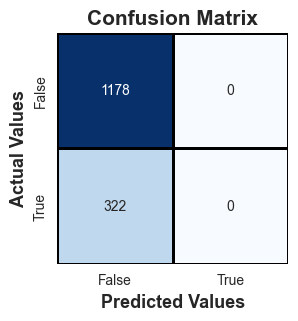


F1-Score: 0.00%
Accuracy: 78.53%
Precision: 0.00%
Recall: 0.00%



In [56]:
# Create dummy classifier
base_model = DummyClassifier(strategy = 'most_frequent')

# Train the base model
base_model.fit(Xt_train, Yt_train)

# Evaluate the model
model_score(base_model, Xt_val, Yt_val)

The base model has decent accuracy when only guessing the majority class of `0`, but has 0 f1-score, accuracy, and recall. Unfortunately, we can't stop here then, we have to keep training models, but we have found a good base. Also, **the f1-score is the official metric of this project.** 

[Back to Contents](#contents)

## 6.1 Without Resampling ##
Let's review the distribution of the target class before resampling. We will be focusing on the unfilled balance data for now until we get to our best estimator type. 

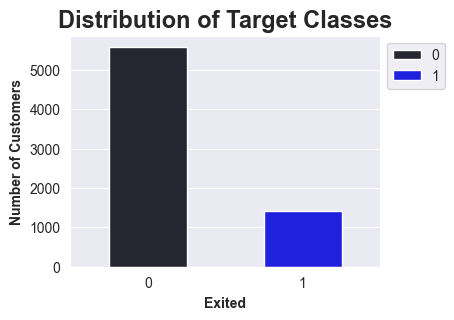


Count of Class 0: 5584
Count of Class 1: 1416
--------------------------------------------------------------------------------
Percentage of class 0: 79.77%
Percentage of class 1: 20.23%
--------------------------------------------------------------------------------

 The ratio of 0 to 1 is 3.94


In [57]:
target_class_dist(Yt_train)

**_Decision Tree_**
<a id='decision_tree'></a>

The following hyperparameters will be tuned to find the best decision tree model:
- `max_depth`: Controls the maximum depth of the tree. This can help mnodel more complex relationships but are usually prone to overfitting. We are coverring a wide range of depths to observe any patterns when charted. We will include some additional parameters to adjust for this overfitting.
- `min_samples_leaf`: Sets the minimum number of samples requred to be at a leaf node. This helps the model become more robust to variations. Should allow us to increase accuracy at the cost of run-time.
- `min_samples_split`: Specifies the minimum number of samples required to split an internal node. This is helpful for the model to prevent learning overly specific patterns.
- `criterion`: I expect entropy to outperform gini due to the class imbalance, but we will test both. 

In [58]:
# Create dictionary to store all of the best models
best_model_dict = {}

# Create dictionary to store the data for the best models
best_model_data_dict = {}

In [59]:
# Define our hyperparams; start wide range, then narrow
dtp_grid = {
     'max_depth': range(5,21),
     'min_samples_split': range(2,41),
     'min_samples_leaf': range(1, 16),
     'criterion': ['entropy', 'gini']
}

dt_result, best_model_dict['Decision Tree'], best_model_data_dict['Decision Tree'] = best_model_search(
    Xt_train, Yt_train, Xt_val, Yt_val,
    estimator = DecisionTreeClassifier,
    param_grid = dtp_grid
)

Completed!


In [60]:
# Look at top 5 results
dt_result.head()

,max_depth,min_samples_split,min_samples_leaf,criterion,accuracy,f1_score
0,13,28,10,gini,0.842667,0.595890
1,15,28,10,gini,0.842667,0.595890
2,15,23,10,gini,0.844000,0.595156
3,14,23,10,gini,0.843333,0.594128
4,13,32,10,gini,0.840667,0.592845


 DecisionTreeClassifier(max_depth=13, min_samples_leaf=10, min_samples_split=28,
                       random_state=12345) 


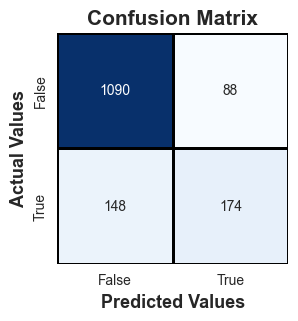


F1-Score: 59.59%
Accuracy: 84.27%
Precision: 66.41%
Recall: 54.04%



In [61]:
# Evalulate the model
model_score(best_model_dict['Decision Tree'], Xt_val, Yt_val)

Without addressing the imbalance issue, we are actually obtaining respectable statistics, in fact, weve already achieved an f1-score of at least .59, but we will work to improve this score. However, this model is in fact better than the base model based on the metrics being greater than 0 and accuaracy being greater than 78%.

**_Random Forest_**

The following hyperparameters will be tuned to find the best random forest model:
- `max_depth`
- `min_samples_leaf`
- `min_samples_split`
- `criterion`
- `n_estimators`: Determines the number of trees.

In [62]:
# Define our hyperparams; start wide then narrow
rfp_grid = {
     'max_depth': [x for x in range(17, 20)],
     'min_samples_split': [x for x in range(2,5)],
     'min_samples_leaf': [2, 3],
     'criterion': ['gini', 'entropy'],
     'n_estimators': [x for x in range(120, 170, 10)],
     'n_jobs': [-1]
}

rf_result, best_model_dict['Random Forest'], best_model_data_dict['Random Forest'] = best_model_search(
    Xt_train, Yt_train, Xt_val, Yt_val,
    estimator = RandomForestClassifier,
    param_grid = rfp_grid
)

Completed!


In [63]:
rf_result.head(5)

,max_depth,min_samples_split,min_samples_leaf,criterion,n_estimators,n_jobs,accuracy,f1_score
0,18,2,2,gini,130,-1,0.862667,0.606870
1,18,3,2,gini,130,-1,0.862667,0.606870
2,18,4,2,gini,130,-1,0.862667,0.606870
3,18,4,2,gini,140,-1,0.862667,0.605364
4,18,3,2,gini,140,-1,0.862667,0.605364


 RandomForestClassifier(max_depth=18, min_samples_leaf=2, n_estimators=130,
                       n_jobs=-1, random_state=12345) 


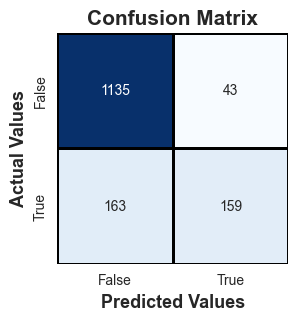


F1-Score: 60.69%
Accuracy: 86.27%
Precision: 78.71%
Recall: 49.38%



In [64]:
model_score(best_model_dict['Random Forest'], Xt_val, Yt_val)

The random forest model provides an impressive f1-score of .607, already satisfying the score of the project, but it is only slightly higher. We will continute to work to improve this model. 

**_K-Nearest Neighbors_**

This model is simple and intuitive; it works well for classification. It finds the closest data points (neighbors) to a given input and predicts the output based on those neighbors. This likely won't outperform our tree models, but let's investigate it anyway for the sake of having a third model!

The following hyperparameters will be tuned to find the best KNN model:
- `n_neighbors`: The number of of neighbors the model will use for predictions
- `algorithm`: This is the algorithm used to compute the nearest neighbors. We will test KD Tre vs Brute vs Ball Tree.
- `p`: Power parameter. When p=1 this is using manhattan distance; p=2 is euclidean distance. We will test 1 vs 2.
- `n_jobs`: We will have this set to -1 to maximize processors. 

In [65]:
# Define our hyperparam grid
knp_grid = {
    'n_neighbors': [x for x in range(2, 21)],
    'algorithm': ['brute', 'kd_tree', 'ball_tree'],
    'p': [1, 2],
    'n_jobs': [-1]
}

kn_result, best_model_dict['KNN'], best_model_data_dict['KNN'] = best_model_search(
    Xt_train, Yt_train, Xt_val, Yt_val,
    estimator = KNeighborsClassifier,
    param_grid = knp_grid
)

Completed!


In [66]:
# Observe top 5 models
kn_result.head(5)

,n_neighbors,algorithm,p,n_jobs,accuracy,f1_score
0,5,ball_tree,2,-1,0.826667,0.511278
1,5,brute,2,-1,0.826667,0.511278
2,5,kd_tree,2,-1,0.826667,0.511278
3,3,brute,2,-1,0.816000,0.494505
4,3,kd_tree,2,-1,0.816000,0.494505


 KNeighborsClassifier(algorithm='brute', n_jobs=-1) 


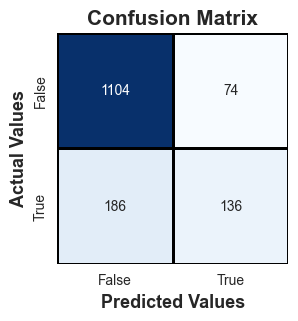


F1-Score: 51.13%
Accuracy: 82.67%
Precision: 64.76%
Recall: 42.24%



In [67]:
model_score(best_model_dict['KNN'], Xt_val, Yt_val)

As predicted, this is not our strongest model so far, but the f1-score is close to the requirements of the project. Through some adjustments, we might be able to bring this model to a score of at least .59.

[Back to Contents](#contents)

## 6.2 Class Weight Adjustment ##
<a id='weights'></a>

Since we have a severe class imbalance, increasing the weight of the minority class penalizes the model for misclassifying. We can try different class weights to find a better model. Let's introduce class weight to our models and see how they either improve, or worsen.

**_Decision Tree_**
The following parameter will be tuned in addition to the previous:
- `class_weight`: We will be setting class_weight to 'balanced' as well as the minority weight being doubled and tripled.

In [68]:
# Establish parameter grid
dtp_grid = {
     'max_depth': range(6,11),
     'min_samples_split': range(20,41, 2),
     'min_samples_leaf': range(5, 11),
     'criterion': ['entropy', 'gini'],
     'class_weight': ['balanced', {0: 1.0, 1: 2.0}, {0: 1, 1: 3}]
}

dt_cw_result, best_model_dict['Weighted Decision Tree'], best_model_data_dict['Weighted Decision Tree'] = best_model_search(
    Xt_train, Yt_train, Xt_val, Yt_val,
    estimator = DecisionTreeClassifier,
    param_grid = dtp_grid
)

Completed!


In [69]:
# observe top 10 results
dt_cw_result.head(10)

,max_depth,min_samples_split,min_samples_leaf,criterion,class_weight,class_weight.0,class_weight.1,accuracy,f1_score
0,10,28,9,entropy,NaN,1.0,2.0,0.827333,0.599691
1,10,30,9,entropy,NaN,1.0,2.0,0.827333,0.598450
2,7,38,10,entropy,NaN,1.0,2.0,0.823333,0.597876
3,7,40,10,entropy,NaN,1.0,2.0,0.823333,0.597876
4,7,36,10,entropy,NaN,1.0,2.0,0.823333,0.597876
5,7,34,9,entropy,NaN,1.0,2.0,0.823333,0.597876
6,7,38,9,entropy,NaN,1.0,2.0,0.823333,0.597876
7,7,34,10,entropy,NaN,1.0,2.0,0.823333,0.597876
8,7,36,9,entropy,NaN,1.0,2.0,0.823333,0.597876
9,7,40,9,entropy,NaN,1.0,2.0,0.823333,0.597876


We achieved a slight improvement in our Decision Tree model with a `f1-score` of 59.97%. 

**_Random Forest_**

We will take a similar approach to our Random Forest Model - adjusting the class weight in the same way. I was achieving the best results with class_weight set to balance, so for the sake of run time the others have been removed. 

In [70]:
# Define our hyperparams; start wide then narrow
rfp_grid = {
     'max_depth': [x for x in range(8, 11)],
     'min_samples_split': [x for x in range(2,6)],
     'min_samples_leaf': [2, 3, 4],
     'criterion': ['gini', 'entropy'],
     'n_estimators': [x for x in range(100, 170, 10)],
     'n_jobs': [-1],
     'class_weight': ['balanced']
}

rf_cw_result, best_model_dict['Weighted Random Forest'], best_model_data_dict['Weighted Random Forest'] = best_model_search(
    Xt_train, Yt_train, Xt_val, Yt_val,
    estimator = RandomForestClassifier,
    param_grid = rfp_grid
)

Completed!


In [71]:
rf_cw_result.head(10)

,max_depth,min_samples_split,min_samples_leaf,criterion,n_estimators,n_jobs,class_weight,accuracy,f1_score
0,9,2,3,gini,150,-1,balanced,0.828667,0.632332
1,9,4,3,gini,150,-1,balanced,0.828667,0.632332
2,9,3,3,gini,150,-1,balanced,0.828667,0.632332
3,9,5,3,gini,150,-1,balanced,0.828667,0.632332
4,9,2,3,gini,160,-1,balanced,0.825333,0.626781
5,9,4,3,gini,160,-1,balanced,0.825333,0.626781
6,9,3,3,gini,160,-1,balanced,0.825333,0.626781
7,9,5,3,gini,160,-1,balanced,0.825333,0.626781
8,9,4,3,gini,100,-1,balanced,0.826667,0.624277
9,9,2,3,gini,100,-1,balanced,0.826667,0.624277


 RandomForestClassifier(class_weight='balanced', max_depth=9, min_samples_leaf=3,
                       n_estimators=150, n_jobs=-1, random_state=12345) 


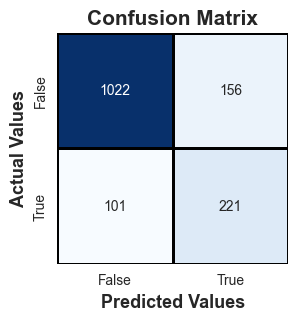


F1-Score: 63.23%
Accuracy: 82.87%
Precision: 58.62%
Recall: 68.63%



In [72]:
model_score(best_model_dict['Weighted Random Forest'], Xt_val, Yt_val)

We achieved a very nice increase in f1-score with an increase just shy of 3%. So far, our best model is looking to be the Random Forest. Let's see how adjusting the class weight affects our KNN model.

**_K-Nearest Neighbors_**

The following parameter will be tuned in addition to the previous:>
- `weights`: We will test uniform vs distance

In [73]:
# Define our hyperparam grid
knp_grid = {
    'n_neighbors': [x for x in range(2, 21)],
    'algorithm': ['brute', 'kd_tree', 'ball_tree'],
    'p': [1, 2],
    'n_jobs': [-1],
    'weights': ['uniform', 'distance']
}

kn_cw_result, best_model_dict['Weighted KNN'], best_model_data_dict['Weighted KNN'] = best_model_search(
    Xt_train, Yt_train, Xt_val, Yt_val,
    estimator = KNeighborsClassifier,
    param_grid = knp_grid
)

Completed!


In [74]:
kn_cw_result.head(5)

,n_neighbors,algorithm,p,n_jobs,weights,accuracy,f1_score
0,5,kd_tree,2,-1,uniform,0.826667,0.511278
1,5,brute,2,-1,uniform,0.826667,0.511278
2,5,ball_tree,2,-1,uniform,0.826667,0.511278
3,5,brute,2,-1,distance,0.823333,0.504673
4,5,ball_tree,2,-1,distance,0.823333,0.504673


 KNeighborsClassifier(algorithm='brute', n_jobs=-1) 


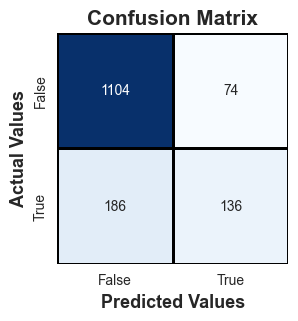


F1-Score: 51.13%
Accuracy: 82.67%
Precision: 64.76%
Recall: 42.24%



In [75]:
model_score(best_model_dict['Weighted KNN'], Xt_val, Yt_val)

Interestingly our model actually didn't improve at all in terms of f1-score. This is because uniform is used by default, and distance wouldn't have helped our data. KNN may improve through other means besides class balance, such as upsampling or downsampling. Let's move on to those methods next. 

[Back to Contents](#contents)

## 6.3 Upsampling ##
<a id='upsample'></a>

Upsampling is another method we can utilize to deal with the imbalanced classification. We will be performing a basic upsampling method with random samples set to repeat a number of different times; in addition, we will test the 1:1 ratio of majority to minority as this may or may not provide us with the best results. 

Currently the ratio of class 0 to 1 is 3.94, let's try a ratio of 1.5 to start or as close as we can get to it. 

In [76]:
rep_1_5 = round((5584 / (1.5 * 1416)))
rep_1_5

3

In [77]:
Xt_train_up13, Yt_train_up13 = resample(Xt_train,
                                    Yt_train,
                                    amount = rep_1_5,
                                    method = 'up')

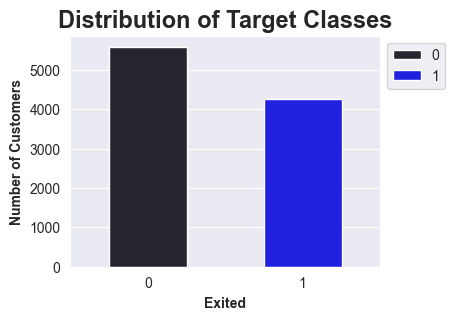


Count of Class 0: 5584
Count of Class 1: 4248
--------------------------------------------------------------------------------
Percentage of class 0: 56.79%
Percentage of class 1: 43.21%
--------------------------------------------------------------------------------

 The ratio of 0 to 1 is 1.31


In [78]:
target_class_dist(Yt_train_up13)

**_Decision Tree_**

Same hyperparamters as previously will be tuned except `class_weight`.

In [79]:
# Establish parameter grid
dtp_grid = {
     'max_depth': range(5,16),
     'min_samples_split': range(20,41, 2),
     'min_samples_leaf': range(5, 11),
     'criterion': ['entropy', 'gini']
}

dt_up13_result, best_model_dict['Decision Tree Up 1.3'], best_model_data_dict['Decision Tree Up 1.3'] = best_model_search(
    Xt_train_up13, Yt_train_up13, Xt_val, Yt_val,
    estimator = DecisionTreeClassifier,
    param_grid = dtp_grid
)

Completed!


In [80]:
dt_up13_result.head(10)

,max_depth,min_samples_split,min_samples_leaf,criterion,accuracy,f1_score
0,7,36,6,entropy,0.802667,0.597826
1,7,22,6,entropy,0.802667,0.597826
2,7,26,6,entropy,0.802667,0.597826
3,7,30,6,entropy,0.802667,0.597826
4,7,40,6,entropy,0.802667,0.597826
5,7,34,6,entropy,0.802667,0.597826
6,7,24,6,entropy,0.802667,0.597826
7,7,20,6,entropy,0.802667,0.597826
8,7,28,6,entropy,0.802667,0.597826
9,7,38,6,entropy,0.802667,0.597826


 DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=6,
                       min_samples_split=20, random_state=12345) 


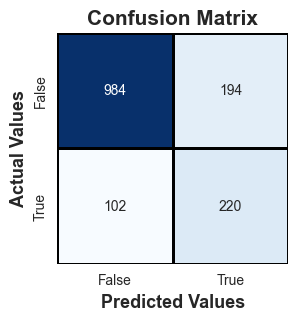


F1-Score: 59.78%
Accuracy: 80.27%
Precision: 53.14%
Recall: 68.32%



In [81]:
model_score(best_model_dict['Decision Tree Up 1.3'], Xt_val, Yt_val)

With an upsampling ratio of 1.3, our best f1-score is **59.78%**. This is **improved** over the **non-resampled** decision tree model, but **worse** than our **balanced** decision tree model. 

**_Random Forest_**

Same parameters will be tuned except for `class_weights`.

In [82]:
# Define our hyperparams; start wide then narrow
rfp_grid = {
     'max_depth': [x for x in range(8, 11)],
     'min_samples_split': [x for x in range(2,6)],
     'min_samples_leaf': [2, 3, 4],
     'criterion': ['gini', 'entropy'],
     'n_estimators': [x for x in range(50, 160, 10)],
     'n_jobs': [-1]
}

rf_up13_result, best_model_dict['Random Forest Up 1.3'], best_model_data_dict['Random Forest Up 1.3'] = best_model_search(
    Xt_train_up13, Yt_train_up13, Xt_val, Yt_val,
    estimator = RandomForestClassifier,
    param_grid = rfp_grid
)

Completed!


In [83]:
rf_up13_result.head(10)

,max_depth,min_samples_split,min_samples_leaf,criterion,n_estimators,n_jobs,accuracy,f1_score
0,8,3,4,entropy,130,-1,0.832000,0.622754
1,8,5,4,entropy,130,-1,0.832000,0.622754
2,8,4,4,entropy,130,-1,0.832000,0.622754
3,8,2,4,entropy,130,-1,0.832000,0.622754
4,8,4,3,entropy,60,-1,0.832667,0.622556
5,8,2,3,entropy,60,-1,0.832667,0.622556
6,8,5,3,entropy,60,-1,0.832667,0.622556
7,8,3,3,entropy,60,-1,0.832667,0.622556
8,8,3,4,entropy,150,-1,0.831333,0.620690
9,8,2,4,entropy,150,-1,0.831333,0.620690


 RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_leaf=4,
                       n_estimators=130, n_jobs=-1, random_state=12345) 


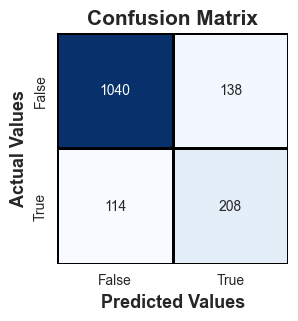


F1-Score: 62.28%
Accuracy: 83.20%
Precision: 60.12%
Recall: 64.60%



In [84]:
model_score(best_model_dict['Random Forest Up 1.3'], Xt_val, Yt_val)

With a class ratio of 1.3, we do not see an improvement from our class_weight model, but we do see improvement over the base Random Forest model. 

**_K-Nearest Neighbors_**

We will tune the same parameters, but not include `weights`.

In [85]:
# Define our hyperparam grid
knp_grid = {
    'n_neighbors': [x for x in range(2, 21)],
    'algorithm': ['brute', 'kd_tree', 'ball_tree'],
    'p': [1, 2],
    'n_jobs': [-1],
    'weights': ['uniform', 'distance']
}

kn_up13_result, best_model_dict['KNN Up 1.3'], best_model_data_dict['KNN Up 1.3'] = best_model_search(
    Xt_train_up13, Yt_train_up13, Xt_val, Yt_val,
    estimator = KNeighborsClassifier,
    param_grid = knp_grid
)

Completed!


In [86]:
kn_up13_result.head(10)

,n_neighbors,algorithm,p,n_jobs,weights,accuracy,f1_score
0,18,kd_tree,1,-1,distance,0.780000,0.565789
1,18,ball_tree,1,-1,distance,0.780000,0.565789
2,18,brute,1,-1,distance,0.780000,0.565789
3,11,brute,1,-1,distance,0.769333,0.565327
4,11,kd_tree,1,-1,distance,0.769333,0.565327
5,11,ball_tree,1,-1,distance,0.769333,0.565327
6,12,brute,1,-1,distance,0.779333,0.565046
7,12,kd_tree,1,-1,distance,0.779333,0.565046
8,12,ball_tree,1,-1,distance,0.779333,0.565046
9,15,ball_tree,1,-1,distance,0.776000,0.562500


 KNeighborsClassifier(algorithm='brute', n_jobs=-1, n_neighbors=18, p=1,
                     weights='distance') 


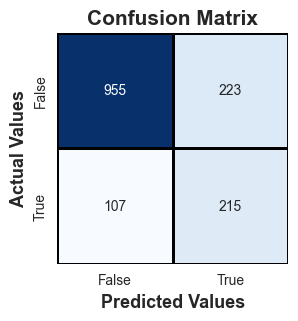


F1-Score: 56.58%
Accuracy: 78.00%
Precision: 49.09%
Recall: 66.77%



In [87]:
model_score(best_model_dict['KNN Up 1.3'], Xt_val, Yt_val)

As predicted, we have significant improvement over both the base KNN model and the weighted KNN model; there is also a slight decrease in accurascy but a large increase in recall. 

**Let's now test an upsampling strategy that puts the class balance as close to 1:1 as we can.**
<a id='one_to_one'></a>

In [88]:
Xt_train_up1, Yt_train_up1 = resample(features = Xt_train,
                                    target = Yt_train,
                                    amount = rep_1_5,
                                    method = 'up',
                                    auto_balance = True)

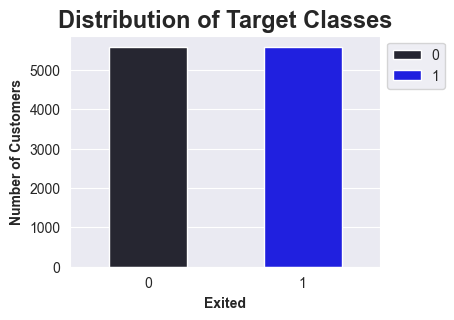


Count of Class 0: 5584
Count of Class 1: 5584
--------------------------------------------------------------------------------
Percentage of class 0: 50.00%
Percentage of class 1: 50.00%
--------------------------------------------------------------------------------

 The ratio of 0 to 1 is 1.00


In [89]:
target_class_dist(Yt_train_up1)

**_Decision Tree_**

In [90]:
# Establish parameter grid
dtp_grid = {
     'max_depth': range(5,16),
     'min_samples_split': range(20,41, 2),
     'min_samples_leaf': range(5, 11),
     'criterion': ['entropy', 'gini']
}

dt_up1_result, best_model_dict['Decision Tree Up 1'], best_model_data_dict['Decision Tree Up 1'] = best_model_search(
    Xt_train_up1, Yt_train_up1, Xt_val, Yt_val,
    estimator = DecisionTreeClassifier,
    param_grid = dtp_grid
)

Completed!


In [91]:
dt_up1_result.head(5)

,max_depth,min_samples_split,min_samples_leaf,criterion,accuracy,f1_score
0,8,20,5,entropy,0.777333,0.593674
1,8,22,5,entropy,0.777333,0.593674
2,8,24,5,entropy,0.777333,0.593674
3,8,26,5,entropy,0.777333,0.593674
4,8,34,5,gini,0.778667,0.593137


 DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=5,
                       min_samples_split=20, random_state=12345) 


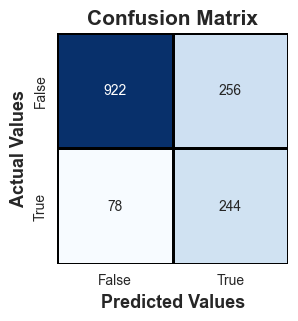


F1-Score: 59.37%
Accuracy: 77.73%
Precision: 48.80%
Recall: 75.78%



In [92]:
model_score(best_model_dict['Decision Tree Up 1'], Xt_val, Yt_val)

This is our best decision tree model yet! \

**_Random Forest_**

In [93]:
# Define our hyperparams; start wide then narrow
rfp_grid = {
     'max_depth': [x for x in range(8, 11)],
     #'min_samples_split': [x for x in range(2,6)],
     #'min_samples_leaf': [2, 3, 4],
     'criterion': ['gini', 'entropy'],
     'n_estimators': [x for x in range(50, 160, 10)],
     'n_jobs': [-1]
}

rf_up1_result, best_model_dict['Random Forest Up 1'], best_model_data_dict['Random Forest Up 1'] = best_model_search(
    Xt_train_up1, Yt_train_up1, Xt_val, Yt_val,
    estimator = RandomForestClassifier,
    param_grid = rfp_grid
)

Completed!


In [94]:
rf_up1_result.head(5)

,max_depth,criterion,n_estimators,n_jobs,accuracy,f1_score
0,9,gini,150,-1,0.820667,0.624826
1,9,gini,140,-1,0.822000,0.624473
2,9,entropy,80,-1,0.818667,0.624309
3,9,entropy,90,-1,0.820000,0.623955
4,9,gini,120,-1,0.820000,0.623955


 RandomForestClassifier(max_depth=9, n_estimators=150, n_jobs=-1,
                       random_state=12345) 


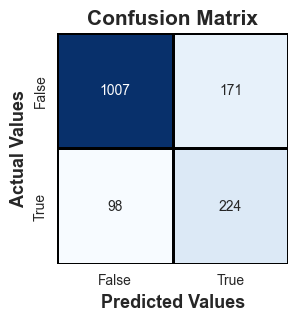


F1-Score: 62.48%
Accuracy: 82.07%
Precision: 56.71%
Recall: 69.57%



In [95]:
model_score(best_model_dict['Random Forest Up 1'], Xt_val, Yt_val)

This is not an improvement over our previous upsampled model with a ratio of 1.3, nor is this an improvement over the class_weights forest model. Let's check the KNN model next. I'm predicting an improvement over the previous upsampled model here. 

**_K-Nearest Neighbors_**

In [96]:
# Define our hyperparam grid
knp_grid = {
    'n_neighbors': [x for x in range(45, 101)],
    'algorithm': ['brute', 'kd_tree', 'ball_tree'],
    'p': [1, 2],
    'n_jobs': [-1]
}

kn_up1_result, best_model_dict['KNN Up 1'], best_model_data_dict['KNN Up 1'] = best_model_search(
    Xt_train_up1, Yt_train_up1, Xt_val, Yt_val,
    estimator = KNeighborsClassifier,
    param_grid = knp_grid
)

Completed!


In [97]:
kn_up1_result.head(5)

,n_neighbors,algorithm,p,n_jobs,accuracy,f1_score
0,52,brute,1,-1,0.762667,0.571084
1,52,kd_tree,1,-1,0.762667,0.571084
2,52,ball_tree,1,-1,0.762667,0.571084
3,53,brute,1,-1,0.757333,0.570755
4,53,ball_tree,1,-1,0.757333,0.570755


 KNeighborsClassifier(algorithm='brute', n_jobs=-1, n_neighbors=52, p=1) 


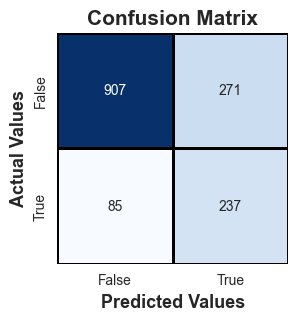


F1-Score: 57.11%
Accuracy: 76.27%
Precision: 46.65%
Recall: 73.60%



In [98]:
model_score(best_model_dict['KNN Up 1'], Xt_val, Yt_val)

Huge improvements over the base KNN model, the weighted KNN model, and a slight improvement in f1-score over the previous upsampled model. But that's okay because the ratios aren't actually that much different. I'm very happy with how this model turned out since it initially had such a low f1-score and now it meets the criteria of the project.

[Back to Contents](#contents)

## 6.4 Downsampling ##
<a id='downsample'></a>

Downsampling is another common method to address class imbalance. The downside here is that were are essentially removing learning data, so the model may lose some information that could aid predictions. The structure of this section will be layed out in a similar manner as the upsampling. I will not print out every confusion matrix in this section, only for random forest model. 

In [99]:
# Obtain ratio of 2
fraction_2 = (2*1416 / 5584)
fraction_2

0.5071633237822349

In [100]:
# Down sample the training sets
Xt_train_down2, Yt_train_down2 = resample(features = Xt_train,
                                          target = Yt_train,
                                          method = 'down',
                                          amount = fraction_2)

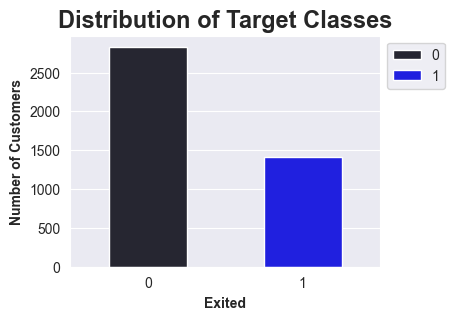


Count of Class 0: 2832
Count of Class 1: 1416
--------------------------------------------------------------------------------
Percentage of class 0: 66.67%
Percentage of class 1: 33.33%
--------------------------------------------------------------------------------

 The ratio of 0 to 1 is 2.00


In [101]:
target_class_dist(Yt_train_down2)

**_Decision Tree_**

In [102]:
# Establish parameter grid
dtp_grid = {
     'max_depth': range(5,16),
     'min_samples_split': range(20,41, 2),
     'min_samples_leaf': range(5, 11),
     'criterion': ['entropy', 'gini']
}

dt_down2_result, best_model_dict['Decision Tree Down 2'], best_model_data_dict['Decision Tree Down 2'] = best_model_search(
    Xt_train_down2, Yt_train_down2, Xt_val, Yt_val,
    estimator = DecisionTreeClassifier,
    param_grid = dtp_grid
)

Completed!


In [103]:
dt_down2_result.head(5)

,max_depth,min_samples_split,min_samples_leaf,criterion,accuracy,f1_score
0,8,38,10,gini,0.827333,0.602151
1,8,40,10,gini,0.827333,0.602151
2,8,36,10,gini,0.827333,0.600924
3,6,22,5,gini,0.824000,0.600000
4,6,26,5,gini,0.824000,0.600000


**_Random Forest_**

In [104]:
# Define our hyperparams; start wide then narrow
rfp_grid = {
     'max_depth': [x for x in range(8, 11)],
     'min_samples_split': [x for x in range(2,6)],
     'min_samples_leaf': [2, 3, 4],
     'criterion': ['gini', 'entropy'],
     'n_estimators': [x for x in range(50, 160, 10)],
     'n_jobs': [-1]
}

rf_down2_result, best_model_dict['Random Forest Down 2'], best_model_data_dict['Random Forest Down 2'] = best_model_search(
    Xt_train_down2, Yt_train_down2, Xt_val, Yt_val,
    estimator = RandomForestClassifier,
    param_grid = rfp_grid
)

Completed!


In [105]:
rf_down2_result.head()

,max_depth,min_samples_split,min_samples_leaf,criterion,n_estimators,n_jobs,accuracy,f1_score
0,9,4,2,gini,130,-1,0.846000,0.618182
1,9,2,2,gini,130,-1,0.846000,0.618182
2,9,3,2,gini,130,-1,0.846000,0.618182
3,9,4,2,gini,150,-1,0.845333,0.615894
4,9,3,2,gini,150,-1,0.845333,0.615894


 RandomForestClassifier(max_depth=9, min_samples_leaf=2, n_estimators=130,
                       n_jobs=-1, random_state=12345) 


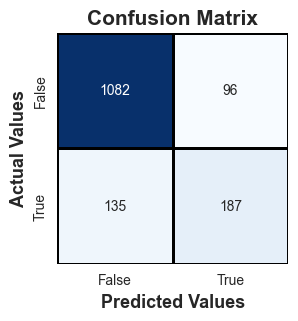


F1-Score: 61.82%
Accuracy: 84.60%
Precision: 66.08%
Recall: 58.07%



In [106]:
model_score(best_model_dict['Random Forest Down 2'], Xt_val, Yt_val)

**_K-Nearest Neightbors_**

In [107]:
# Define our hyperparam grid
knp_grid = {
    'n_neighbors': [x for x in range(45, 101)],
    'algorithm': ['brute', 'kd_tree', 'ball_tree'],
    'p': [1, 2],
    'n_jobs': [-1]
}

kn_down2_result, best_model_dict['KNN Down 2'], best_model_data_dict['KNN Down 2'] = best_model_search(
    Xt_train_down2, Yt_train_down2, Xt_val, Yt_val,
    estimator = KNeighborsClassifier,
    param_grid = knp_grid
)

Completed!


In [108]:
kn_down2_result.head()

,n_neighbors,algorithm,p,n_jobs,accuracy,f1_score
0,57,kd_tree,1,-1,0.831333,0.544144
1,57,ball_tree,1,-1,0.831333,0.544144
2,57,brute,1,-1,0.831333,0.544144
3,49,ball_tree,1,-1,0.830000,0.538879
4,49,kd_tree,1,-1,0.830000,0.538879


Overall, our results were not as good as previous models. Let's try downsampling so that the ratio is 1 and see if we can achieve improvements. 
<a id='down_one'></a>

In [109]:
# Down sample the training sets
Xt_train_down1, Yt_train_down1 = resample(features = Xt_train,
                                          target = Yt_train,
                                          method = 'down',
                                          amount = fraction_2,
                                          auto_balance = True)

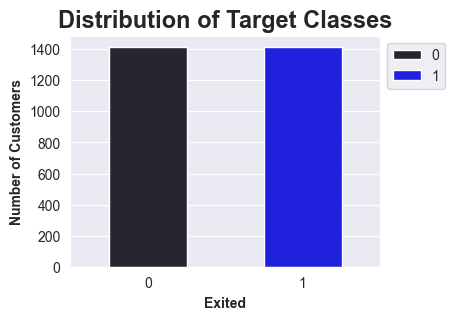


Count of Class 0: 1416
Count of Class 1: 1416
--------------------------------------------------------------------------------
Percentage of class 0: 50.00%
Percentage of class 1: 50.00%
--------------------------------------------------------------------------------

 The ratio of 0 to 1 is 1.00


In [110]:
target_class_dist(Yt_train_down1)

**_Decision Tree_**

In [111]:
# Establish parameter grid
dtp_grid = {
     'max_depth': range(5,16),
     'min_samples_split': range(20,41, 2),
     'min_samples_leaf': range(5, 11),
     'criterion': ['entropy', 'gini']
}

dt_down1_result, best_model_dict['Decision Tree Down 1'], best_model_data_dict['Decision Tree Down 1'] = best_model_search(
    Xt_train_down1, Yt_train_down1, Xt_val, Yt_val,
    estimator = DecisionTreeClassifier,
    param_grid = dtp_grid
)

Completed!


In [112]:
dt_down1_result.head(3)

,max_depth,min_samples_split,min_samples_leaf,criterion,accuracy,f1_score
0,6,36,6,gini,0.793333,0.5953
1,6,30,6,gini,0.793333,0.5953
2,6,28,6,gini,0.793333,0.5953


This is actually worse than our base Decision Tree model (with no weight or sampling methods applied)

**_Random Forest_**

In [113]:
# Define our hyperparams; start wide then narrow
rfp_grid = {
     'max_depth': [x for x in range(8, 11)],
     'min_samples_split': [x for x in range(2,6)],
     'min_samples_leaf': [2, 3, 4],
     'criterion': ['gini', 'entropy'],
     'n_estimators': [x for x in range(50, 160, 10)],
     'n_jobs': [-1]
}

rf_down1_result, best_model_dict['Random Forest Down 1'], best_model_data_dict['Random Forest Down 1'] = best_model_search(
    Xt_train_down1, Yt_train_down1, Xt_val, Yt_val,
    estimator = RandomForestClassifier,
    param_grid = rfp_grid
)

Completed!


In [114]:
rf_down1_result.head(3)

,max_depth,min_samples_split,min_samples_leaf,criterion,n_estimators,n_jobs,accuracy,f1_score
0,10,5,3,entropy,50,-1,0.782,0.601705
1,10,3,3,entropy,50,-1,0.782,0.601705
2,10,4,3,entropy,50,-1,0.782,0.601705


 RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=3,
                       n_estimators=50, n_jobs=-1, random_state=12345) 


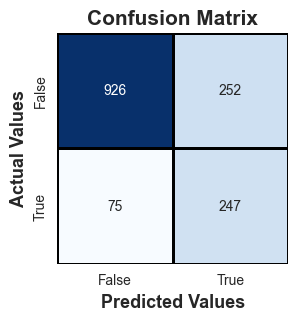


F1-Score: 60.17%
Accuracy: 78.20%
Precision: 49.50%
Recall: 76.71%



In [115]:
model_score(best_model_dict['Random Forest Down 1'], Xt_val, Yt_val)

**_K-Nearest Neightbors_**

In [116]:
# Define our hyperparam grid
knp_grid = {
    'n_neighbors': [x for x in range(45, 101)],
    'algorithm': ['brute', 'kd_tree', 'ball_tree'],
    'p': [1, 2],
    'n_jobs': [-1]
}

kn_down1_result, best_model_dict['KNN Down 1'], best_model_data_dict['KNN Down 1'] = best_model_search(
    Xt_train_down1, Yt_train_down1, Xt_val, Yt_val,
    estimator = KNeighborsClassifier,
    param_grid = knp_grid
)

Completed!


In [117]:
kn_down1_result.head(3)

,n_neighbors,algorithm,p,n_jobs,accuracy,f1_score
0,60,brute,1,-1,0.762,0.578512
1,60,kd_tree,1,-1,0.762,0.578512
2,60,ball_tree,1,-1,0.762,0.578512


It appears that downsampling the majority class to a ratio of 1:1 hurts the integrity of the Decision Tree and Forest models worse off than their non-weighted, non-resampled models. However, interestingly, the KNN model had a worse f1-score when downsampled to a ratio of 2, but improved when downsampled to a ratio of 1. It is not our most accurate model, but it shines where others are weak, and is weak where others have been strong. 

It would be interesting to build a more in-depth function that can go through our data and determine the best ratio for upsampling and downsampling, as it is possible that we need to have a ratio slightly above 2 or slightly below. That is for another time however, we will be moving on from downsampling at this point. 

[Back to Contents](#contents)
<a id='func_ref'></a>

# 7. Final Model Selection and Evaluation #
<a id='final_model'></a>

In [118]:
# Create two lists containing the information of the best models (from our dictionary)
best_model_type = []
best_model_data = []

for model_type, model_data in best_model_data_dict.items():
    best_model_type.append(model_type)
    best_model_data.append(model_data)

# Create dataframe for all best models and metrics
best_model_df = pd.DataFrame({'model': best_model_type, 'data': best_model_data})

# Remove the JSON formatting
best_model_df = pd.concat([best_model_df['model'], pd.json_normalize(best_model_df['data'], max_level=0)], axis = 1)

# Sort the dataframe
best_model_df = best_model_df.sort_values(by = 'f1_score', ascending = False).reset_index(drop = True)

In [119]:
# Observe
best_model_df

,model,class_0_count,class_1_count,hyperparameters,accuracy,f1_score
0,Weighted Random Forest,5584,1416,"{'max_depth': 9, 'min_samples_split': 2, 'min_...",0.828667,0.632332
1,Random Forest Up 1,5584,5584,"{'max_depth': 9, 'criterion': 'gini', 'n_estim...",0.820667,0.624826
2,Random Forest Up 1.3,5584,4248,"{'max_depth': 8, 'min_samples_split': 2, 'min_...",0.832000,0.622754
3,Random Forest Down 2,2832,1416,"{'max_depth': 9, 'min_samples_split': 2, 'min_...",0.846000,0.618182
4,Random Forest,5584,1416,"{'max_depth': 18, 'min_samples_split': 2, 'min...",0.862667,0.606870
5,Decision Tree Down 2,2832,1416,"{'max_depth': 8, 'min_samples_split': 38, 'min...",0.827333,0.602151
6,Random Forest Down 1,1416,1416,"{'max_depth': 10, 'min_samples_split': 2, 'min...",0.782000,0.601705
7,Weighted Decision Tree,5584,1416,"{'max_depth': 10, 'min_samples_split': 28, 'mi...",0.827333,0.599691
8,Decision Tree Up 1.3,5584,4248,"{'max_depth': 7, 'min_samples_split': 20, 'min...",0.802667,0.597826
9,Decision Tree,5584,1416,"{'max_depth': 13, 'min_samples_split': 28, 'mi...",0.842667,0.595890


There is 1 clear winning model as the top 5 are far enough in part in f1-score values, and that is the **Weighted Random Forest Model**. Actually, the top 5 models are all Random Forest models, as was expected. Unfortauntely KNN wasn't our top performing model as it is in the bottom of the ranks, despite how exciting it was to train, but it did show the most improvements. 

## 7.1 Threshold Adjustment ##
<a id='threshold'></a>

Adjusting the threshold can allow us to achieve a higher f1-score, this may come at a cost to accuracy and recall though. We will choose the threshold value that produces the highest f1-score per the criteria of Beta Bank. 

In [120]:
# Assign the final model
final_model = best_model_dict['Weighted Random Forest']
#final_model

In [121]:
# Find the best threshold value
best_f1 = 0
best_thresh = 0
probs_one_val = final_model.predict_proba(Xt_val)[:,1]

for thresh in np.arange(0, 1.01, 0.01):
    pred_valid = (probs_one_val >= thresh)
    f1 = f1_score(Yt_val, pred_valid)

    if f1 > best_f1:
        best_f1 = f1
        best_thresh = thresh

print('\033[1m')
print(f"Best f1-score: {best_f1}")
print(f"Best threshold: {best_thresh}")
print('\033[1m')


Best f1-score: 0.6323319027181689
Best threshold: 0.5



It appears there is no need to make a threshold adjustment.

[Back to Contents](#contents)

## 7.2 F1-Score, Precision, and Recall ##
<a id='final_stats'></a>

 RandomForestClassifier(class_weight='balanced', max_depth=9, min_samples_leaf=3,
                       n_estimators=150, n_jobs=-1, random_state=12345) 


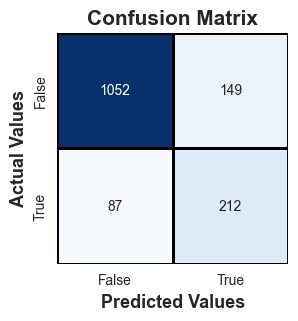


F1-Score: 64.24%
Accuracy: 84.27%
Precision: 58.73%
Recall: 70.90%



In [122]:
# Evaluate the final model
model_score(final_model, Xt_test, Yt_test)

 RandomForestClassifier(class_weight='balanced', max_depth=9, min_samples_leaf=3,
                       n_estimators=150, n_jobs=-1, random_state=12345) 


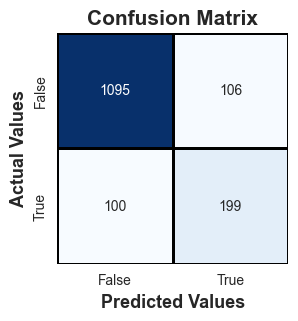


F1-Score: 65.89%
Accuracy: 86.27%
Precision: 65.25%
Recall: 66.56%



In [123]:
model_score(final_model, Xt_test, Yt_test, threshold=0.55) 
#confusing why the validation set showed no improvement with threshold adjustment, but test set does

Before adjusting the threshold we had an F1-Score of **64.24%** and after adjusting it, even though this was not validated through the validation set probabilities, increased to **65.89%** over a 1% increase. This is fantastic!

In [124]:
# Print classification report
Targ_scores = final_model.predict_proba(Xt_test)[:, 1]
Targ_preds = (Targ_scores >= 0.55)

print('Classification Report\n')
print(classification_report(Yt_test, Targ_preds))

Classification Report

              precision    recall  f1-score   support

           0       0.92      0.91      0.91      1201
           1       0.65      0.67      0.66       299

    accuracy                           0.86      1500
   macro avg       0.78      0.79      0.79      1500
weighted avg       0.86      0.86      0.86      1500



From the classification report we can see a few things. The model performs better at predicting the `0 class` (customers who stay), with an f1-score of 91%. The f1-score of the `1 class` (customers who departed) is 66%. 

The objective was to retain the customers who might leave, so predicting `1s` is more important than predicting `0s`. The precision for predicing `1 class` customers is 65%, this is above average.

The target variable had an imbalance of 80:20, this could be the reason the model is not great at predicting the `1 class` customers. This is verified by the higher `weighted avg` scores than the `micro avg` scores. 

[Back to Contents](#contents)

## 7.3 Testing the Filled Data ##
<a id='filled'></a>

Just out of curiosity to see if my idea for handling the 0s in balance would have led to an improvement or not. 

 DummyClassifier(strategy='most_frequent') 


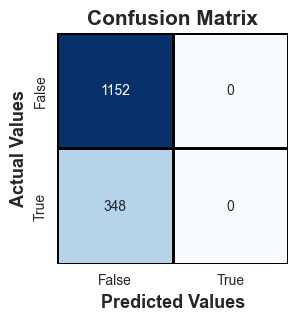


F1-Score: 0.00%
Accuracy: 76.80%
Precision: 0.00%
Recall: 0.00%



In [125]:
# Create dummy classifier
base_model = DummyClassifier(strategy = 'most_frequent')

# Train the base model
base_model.fit(Xtf_train, Ytf_train)

# Evaluate the model
model_score(base_model, Xtf_val, Ytf_val)

In [126]:
# Train the model
# Define our hyperparams; start wide then narrow
rfp_grid = {
     'max_depth': [x for x in range(1, 16)],
     #'min_samples_split': [x for x in range(2,6)],
     #'min_samples_leaf': [2, 3, 4],
     'criterion': ['gini', 'entropy'],
     'n_estimators': [x for x in range(30, 170, 10)],
     'n_jobs': [-1],
     'class_weight': ['balanced']
}

rff_cw_result, best_model_dict['Weighted Random Forest Filled'], best_model_data_dict['Weighted Random Forest Filled'] = best_model_search(
    Xtf_train, Ytf_train, Xtf_val, Ytf_val,
    estimator = RandomForestClassifier,
    param_grid = rfp_grid
)

Completed!


In [127]:
rff_cw_result.head(10)

,max_depth,criterion,n_estimators,n_jobs,class_weight,accuracy,f1_score
0,10,gini,110,-1,balanced,0.820667,0.616262
1,9,entropy,130,-1,balanced,0.808000,0.616000
2,10,gini,90,-1,balanced,0.819333,0.615603
3,10,gini,150,-1,balanced,0.820000,0.615385
4,9,gini,80,-1,balanced,0.810667,0.615176
5,11,entropy,100,-1,balanced,0.823333,0.614265
6,9,gini,100,-1,balanced,0.812000,0.613699
7,10,gini,160,-1,balanced,0.819333,0.613409
8,11,entropy,110,-1,balanced,0.822667,0.613372
9,7,gini,150,-1,balanced,0.797333,0.613232


 RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=110,
                       n_jobs=-1, random_state=12345) 


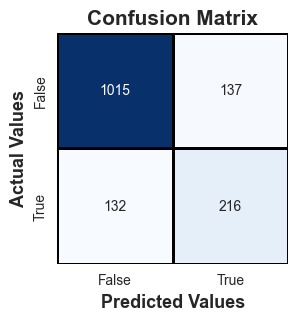


F1-Score: 61.63%
Accuracy: 82.07%
Precision: 61.19%
Recall: 62.07%



In [128]:
model_score(best_model_dict['Weighted Random Forest Filled'], Xtf_val, Ytf_val)

The F1-score for the `Weighted Random Forest Model` was 63%, this was not an improvement. Darn!

[Back to Contents](#contents)

## 7.4 ROC Curve and AUC-ROC Score ##
<a id='ROC'></a>

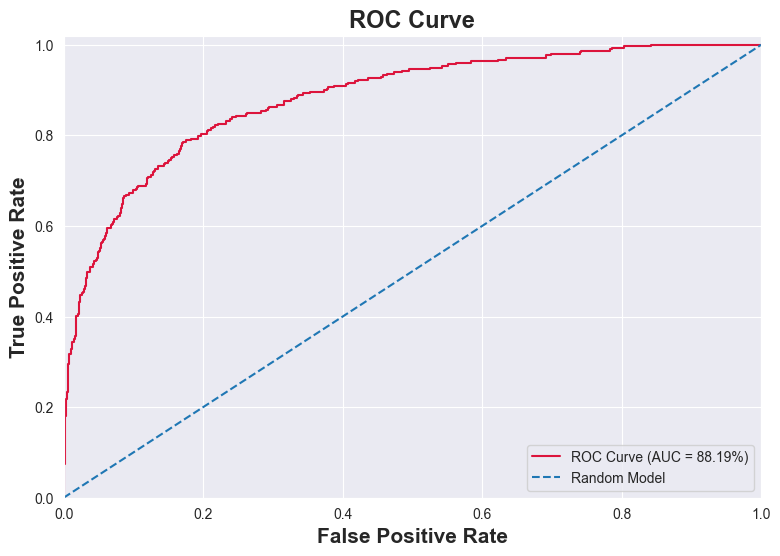

In [129]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(Yt_test, Targ_scores)

# Calculate the AUC-ROC score
auc_roc = roc_auc_score(Yt_test, Targ_scores)

# Plot the ROC curve
sns.set_style('darkgrid')
plt.figure(figsize=(9,6))

plt.plot(fpr, tpr, color = 'crimson', label = f'ROC Curve (AUC = {auc_roc:.2%})')
plt.plot([0,1], [0,1], linestyle = '--', label = 'Random Model')

plt.title("ROC Curve", fontsize = 17, fontweight = 'bold')
plt.xlabel("False Positive Rate", fontsize = 15, fontweight = 'bold')
plt.ylabel("True Positive Rate", fontsize = 15, fontweight = 'bold')
plt.legend(loc = 'lower right')

plt.xlim([0,1])
plt.ylim([0,1.02])

plt.show()

**An AUC-ROC score of 88.19% implies the model is a good model, but it's not perfect.**

**Potential Improvements:**
- Learning about and testing more models.
- Developing a more in-depth function that can go through the data and determine the best ratio for upsampling and downsampling. [See Here](#func_ref)
- Collect more data in the minority class to improve upon the ratio between minority and majority so upsampling/downsampling isn't weighted so heavily.

[Back to Contents](#contents)

# 8.0 Conclusion #
<a id='conclusion'></a>

**Data Exploration and Preprocessing:**

In this stage, the following issues were identified and resolved(in a later stage):
- The columns were renamed via snake-case conventions.
- The `RowNumber`. `CustomerID`, and `Surname` columns were dropped as they add no information to the models.
- The categorical features `Geography` and `Gender` were transformed.
- The `Tenure` column had 909 missing values, these were filled randomly.
- The ranges of the values of the numerical features were on different scales, so features scaling was applied.

**EDA**
- The distributions of `credit_score` and `age` were skewed. Log transformation was applied to make them closer to a normal distribution.
- We determined that `age`, `geography`, `gender`, `num_of_products` and `is_active_member` would be potential good indicators for a model to predict whether a customer will depart.

**Development and Fine Tuning of Different Models**

A total of 20 machine learning models were developed through the `Decision Tree`, the `Random Forest`, and the `K-Nearest Neighbors` as bases, and then applying different techniques to attempt to approve f1-score. These techniques were as follows:
- Class weight adjustments with the models.
- Upsampling: We tested as close to a ratio of 1.5 as we could and a ratio of 1.
- Downsampling: We tested a ratio of 2:1 and 1:1.

**Selecting Final Model**

After combining all the model data into a final dataframe, we selected the model that gave us the highest f1-score from this data. That was the `Weighted Random Forest` model, the Random Forest model with class weight adjustments applied to it. The top 5 performing models were as follows:
- `Weighted Random Forest` - 63.23%'
- `Random Forest Up 1` - 63.23%
- `Random Forest Up 1.3` - 62.4%
- `Random Forest Down 2` - 61.81%
- `Random Forest` - 60.69%

All random forest models. We could have also worked with the Random Forest upscaled to 1:1 model as well since it scored the same, but we chose the weighted model in the end. It would be interesting to go back and see how the upscaled model would have performed.

After applying a threshold adjustment on the validation data, it determined there would be no need to apply an adjustment on the test data, as it did not improve from 0.5, but applying threshold adjustments at 0.51, 0.52, 0.53, 0.54, 0.55, and 0.56 manually, we found that the final f1-score on the test data improvedd from **64.24%** to **65.89%** which I chose to accept as the final assessment of our model and meets the expectations of Beta Bank.

The **ROC-AUC Score** was **88.19%**, indicating that the model is a good model, although of course it is not perfect. 

**Possible Improvements to Make:**
1. Learning about and testing more models.
2. Developing a more in-depth function that can go through the data and determine the best ratio for upsampling and downsampling. [See Here](#func_ref)
3. Collect more data in the minority class to improve upon the ratio between minority and majority so upsampling/downsampling could potentially be more effective.

[Back to Contents](#contents)